In [1]:
# importation des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# chargez le dataset
spm=pd.read_csv("data/spm.csv")

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {spm.shape[0]} lignes et {spm.shape[1]} colonnes")

# Affichez les 5 premières lignes
spm.head()

Le jeu de données a 2656 lignes et 7 colonnes


,id,Name,Gender,Produit,Type,Prix,Date
0,id id,Name Name,GGeennddeerr,Produit Produit,Type Type,PrPixrix,Date Date
1,1,Mark Green,Male,Saucisson à l'anis,Charcuterie,1400,2022-11-18 02:48:01
2,2,Chukwudi Eze,Male,Pâté de lapin aux noix,Charcuterie,1800,2022-04-26 20:34:38
3,3,Babatunde Adewale,Male,Sachet de sel,Condiment,500,2022-11-14 13:08:04
4,4,Victoria Young,Female,Terrine de faisan aux morilles,Charcuterie,1700,2022-07-23 09:55:19


In [3]:
# Supprimer les lignes avec la valeur de l'ID égale à "id id"
spm.drop(spm[spm['id'] == 'id id'].index, inplace=True)

# Trier le DataFrame par ordre croissant selon la colonne 'Date'
spm = spm.sort_values(by='Date', ascending=True)

# Réinitialiser les index
spm.reset_index(drop=True, inplace=True)

In [4]:
# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {spm.shape[0]} lignes et {spm.shape[1]} colonnes")

# Affichez les 5 premières lignes
spm.head()

Le jeu de données a 2619 lignes et 7 colonnes


,id,Name,Gender,Produit,Type,Prix,Date
0,1895,Mason Taylor,Male,Boîte de mouchoirs en papier Tempo,Hygiène,750,2021-01-01 09:54:04
1,1961,Kwesi Bonsu,Male,Lingettes démaquillantes biodégradables Nivea,Produits de démaquillage,800,2021-01-04 06:26:30
2,1861,Nevaeh Nelson,Female,Saucisson à l'Espelette,Charcuterie,1400,2021-01-06 01:29:06
3,2011,Bintou Traoré,Female,Jambon fumé,Charcuterie,1400,2021-01-06 07:14:32
4,1984,Julian Howard,Male,Pot de moutarde,Condiment,500,2021-01-10 12:07:19


In [5]:
# copie du dataset
df=spm.copy()

In [6]:
#info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       2583 non-null   object
 1   Name     2583 non-null   object
 2   Gender   2583 non-null   object
 3   Produit  2583 non-null   object
 4   Type     2583 non-null   object
 5   Prix     2583 non-null   object
 6   Date     2583 non-null   object
dtypes: object(7)
memory usage: 143.4+ KB


In [7]:
# Convertir la colonne "Prix" en float
df['Prix'] = df['Prix'].astype(float)

# Convertir la colonne "Date" en datetime
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       2583 non-null   object        
 1   Name     2583 non-null   object        
 2   Gender   2583 non-null   object        
 3   Produit  2583 non-null   object        
 4   Type     2583 non-null   object        
 5   Prix     2583 non-null   float64       
 6   Date     2583 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 143.4+ KB


In [8]:
#supprimer les valeur manquantes
df.dropna(axis=0, inplace=True)
print(f"Le jeu de données a {df.shape[0]} lignes et {df.shape[1]} colonnes")

Le jeu de données a 2583 lignes et 7 colonnes


In [9]:
#valeur dupliquer
df.duplicated().any()

False

In [10]:
df

,id,Name,Gender,Produit,Type,Prix,Date
0,1895,Mason Taylor,Male,Boîte de mouchoirs en papier Tempo,Hygiène,750.0,2021-01-01 09:54:04
1,1961,Kwesi Bonsu,Male,Lingettes démaquillantes biodégradables Nivea,Produits de démaquillage,800.0,2021-01-04 06:26:30
2,1861,Nevaeh Nelson,Female,Saucisson à l'Espelette,Charcuterie,1400.0,2021-01-06 01:29:06
3,2011,Bintou Traoré,Female,Jambon fumé,Charcuterie,1400.0,2021-01-06 07:14:32
4,1984,Julian Howard,Male,Pot de moutarde,Condiment,500.0,2021-01-10 12:07:19
...,...,...,...,...,...,...,...
2578,2121,Cassandra Coleman,Female,Saucisse fumée,Charcuterie,1400.0,2024-01-30 15:30:02
2579,2180,Nabila Sow,Female,Paquet de chips Lay's,Snack,750.0,2024-01-31 04:08:53
2580,2051,Kwame Mensah,Male,Rillettes de porc,Charcuterie,1300.0,2024-01-31 07:38:57
2581,2091,Jose Thompson,Male,Boîte de haricots verts en conserve,Condiment,750.0,2024-01-31 12:33:11


In [11]:
# Extraire le mois et l'année de chaque date
df['Mois'] = df['Date'].dt.month
df['Année'] = df['Date'].dt.year

In [12]:
# Calculer le chiffre d'affaires par produit pour chaque mois
df = df.groupby(['Produit', 'Année', 'Mois']).agg({'Prix': ['count', 'sum', 'mean']})
df.columns = ['Nombre de ventes', 'CA', 'Prix Unitaire']
df = df.reset_index()

# afficher le dataframe
df.head(15)

,Produit,Année,Mois,Nombre de ventes,CA,Prix Unitaire
0,Andouille,2021,5,1,1600.0,1600.0
1,Andouille,2022,2,1,1600.0,1600.0
2,Andouille,2022,8,2,3200.0,1600.0
3,Andouille,2022,11,1,1600.0,1600.0
4,Andouille,2022,12,2,3200.0,1600.0
5,Andouille,2023,7,1,1600.0,1600.0
6,Andouille,2023,12,1,1600.0,1600.0
7,Barre de chocolat Milka,2022,1,1,750.0,750.0
8,Barre de chocolat Milka,2022,5,1,750.0,750.0
9,Barre de chocolat Milka,2022,8,1,750.0,750.0


# Recherche des meilleurs produits

In [13]:
# vente par annee pour chaque produit 
ventes_par_annee = df.groupby(['Produit', 'Année']).agg({'Nombre de ventes': 'sum', 'CA': 'sum'}).reset_index()
ventes_par_annee

,Produit,Année,Nombre de ventes,CA
0,Andouille,2021,1,1600.0
1,Andouille,2022,6,9600.0
2,Andouille,2023,2,3200.0
3,Barre de chocolat Milka,2022,6,4500.0
4,Barre de chocolat Milka,2023,5,3750.0
...,...,...,...,...
894,Terrine de sanglier,2023,6,10200.0
895,Terrine de sanglier,2024,1,1700.0
896,Tube de dentifrice Colgate,2022,2,1500.0
897,Tube de dentifrice Colgate,2023,1,750.0


In [14]:
# Calculer le nombre d'années de vente pour chaque produit
annees_vente_par_produit = ventes_par_annee.groupby('Produit')['Année'].nunique().reset_index()

# Calculer la somme des ventes et du chiffre d'affaires pour chaque produit
somme_ventes_ca_par_produit = ventes_par_annee.groupby('Produit').agg({'Nombre de ventes': 'sum', 'CA': 'sum'}).reset_index()

# Fusionner les DataFrames pour obtenir le nombre d'années de vente, la somme des ventes et la somme du chiffre d'affaires par produit
merged_df = pd.merge(annees_vente_par_produit, somme_ventes_ca_par_produit, on='Produit')

# Afficher le DataFrame avec les ventes moyennes par année de vente et le chiffre d'affaires pour chaque produit
merged_df

,Produit,Année,Nombre de ventes,CA
0,Andouille,3,9,14400.0
1,Barre de chocolat Milka,3,12,9000.0
2,Baume après-rasage Gillette,4,9,6300.0
3,Baume après-rasage hydratant Nivea,3,13,9100.0
4,Baume après-rasage sans alcool Nivea,2,5,3500.0
...,...,...,...,...
317,Terrine de perdreau,4,6,10200.0
318,Terrine de pigeon,2,10,17000.0
319,Terrine de pintade,3,9,14400.0
320,Terrine de sanglier,4,13,22100.0


In [15]:
# Déterminer l'année maximale dans le DataFrame
annee_maximale = merged_df['Année'].max()

# Diviser la colonne "Nombre de ventes" par l'année maximale
merged_df['Nombre de ventes normalisé'] = merged_df['Nombre de ventes'] / annee_maximale

# Diviser la colonne "CA" par l'année maximale
merged_df['CA normalisé'] = merged_df['CA'] / annee_maximale

# Supprimer les colonnes normalisées si elles existent déjà
merged_df.drop(['Nombre de ventes', 'CA'], axis=1, errors='ignore', inplace=True)

# afficher le dataframe
merged_df.head()

,Produit,Année,Nombre de ventes normalisé,CA normalisé
0,Andouille,3,2.25,3600.0
1,Barre de chocolat Milka,3,3.00,2250.0
2,Baume après-rasage Gillette,4,2.25,1575.0
3,Baume après-rasage hydratant Nivea,3,3.25,2275.0
4,Baume après-rasage sans alcool Nivea,2,1.25,875.0


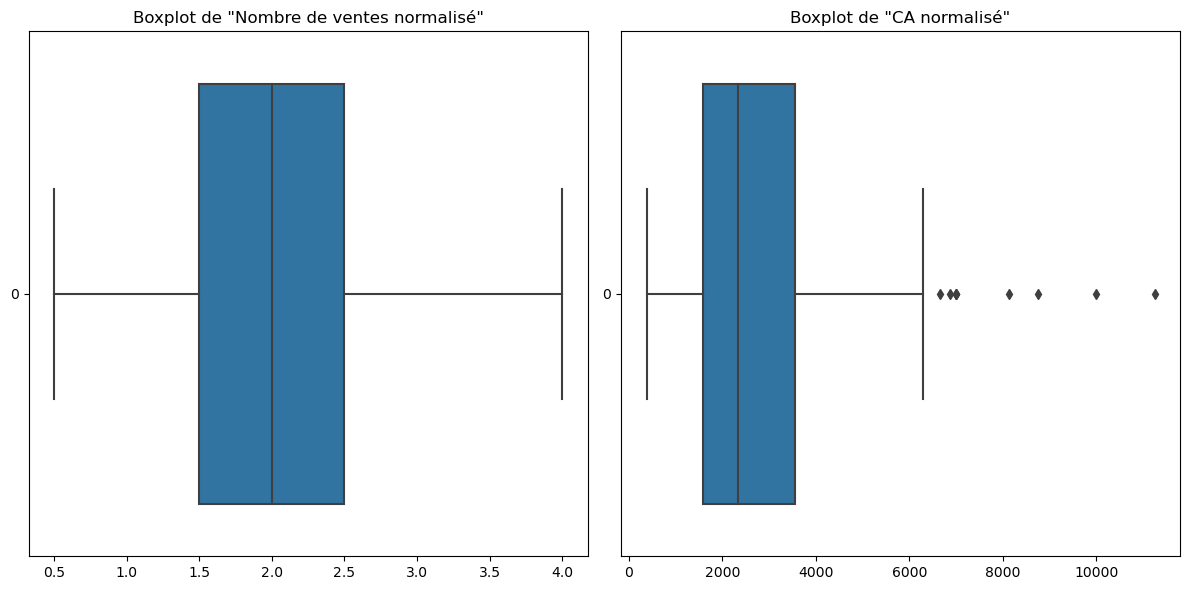

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une figure avec deux sous-graphiques côte à côte
plt.figure(figsize=(12, 6))

# Tracer le premier boxplot pour 'Nombre de ventes normalisé'
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, premier sous-graphique
sns.boxplot(data=merged_df["Nombre de ventes normalisé"], orient='h')
plt.title('Boxplot de "Nombre de ventes normalisé"')

# Tracer le deuxième boxplot pour 'CA normalisé'
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, deuxième sous-graphique
sns.boxplot(data=merged_df["CA normalisé"], orient='h')
plt.title('Boxplot de "CA normalisé"')

# Afficher les graphiques
plt.tight_layout()  # Ajuster automatiquement la mise en page pour éviter le chevauchement
plt.show()

In [17]:
# selection des produits superieurs au 3em quartille
merged_df=merged_df[merged_df["Nombre de ventes normalisé"]>2.5]
merged_df

,Produit,Année,Nombre de ventes normalisé,CA normalisé
1,Barre de chocolat Milka,3,3.00,2250.0
3,Baume après-rasage hydratant Nivea,3,3.25,2275.0
15,Bouteille d'eau minérale Cristaline,3,2.75,1375.0
18,Bouteille de bière Guinness,4,3.00,3000.0
24,Bouteille de shampoing Head & Shoulders,2,3.25,4875.0
40,Coppa,3,3.75,6000.0
42,Crème anti-rides Nivea,4,3.25,8125.0
55,Crème raffermissante pour le corps Garnier,3,3.50,7000.0
56,Crème réparatrice Cicabiafine,3,3.25,4875.0
58,Crème réparatrice pour les pieds Scholl,3,3.00,4500.0


In [18]:
# Trier le dataframe par 'Nombre de ventes normalisé' puis par 'CA normalisé' en cas d'égalité
top_10_produits = merged_df.sort_values(by=['Nombre de ventes normalisé', 'CA normalisé'], ascending=False).head(10)

# Afficher le top 10 des produits
top_10_produits

,Produit,Année,Nombre de ventes normalisé,CA normalisé
280,Saucisson à la pistache,4,4.00,6300.0
305,Sérum hydratant Vichy,3,3.75,11250.0
40,Coppa,3,3.75,6000.0
202,Rillettes d'oie,2,3.75,5625.0
269,Saucisson aux noisettes,3,3.75,5250.0
270,Saucisson de Lyon,4,3.75,5250.0
55,Crème raffermissante pour le corps Garnier,3,3.50,7000.0
112,Jambon de Luxeuil,3,3.50,7000.0
124,Jambon des Ardennes,2,3.50,7000.0
111,Jambon de Bayonne,4,3.50,6650.0


In [19]:
# Obtenir une liste des produits uniques
produits_uniques = top_10_produits["Produit"].unique()

# Identifier les éléments de la liste des produits uniques dans le DataFrame
df = df[df['Produit'].isin(produits_uniques)]
df

,Produit,Année,Mois,Nombre de ventes,CA,Prix Unitaire
259,Coppa,2021,12,1,1600.0,1600.0
260,Coppa,2022,1,1,1600.0,1600.0
261,Coppa,2022,6,1,1600.0,1600.0
262,Coppa,2022,7,1,1600.0,1600.0
263,Coppa,2022,9,2,3200.0,1600.0
...,...,...,...,...,...,...
2097,Sérum hydratant Vichy,2023,1,1,3000.0,3000.0
2098,Sérum hydratant Vichy,2023,9,1,3000.0,3000.0
2099,Sérum hydratant Vichy,2023,11,2,6000.0,3000.0
2100,Sérum hydratant Vichy,2023,12,1,3000.0,3000.0


In [20]:
# Créer une colonne "Date"
df["Date"] = pd.to_datetime(df["Année"].astype(str) + "-" + df["Mois"].astype(str))

# Supprimer les colonnes Année et Mois car elles ne sont plus nécessaires
df.drop(columns=['Année', 'Mois'], inplace=True)

# Trier les données par date
df = df.sort_values('Date')

# afficher
df

,Produit,Nombre de ventes,CA,Prix Unitaire,Date
757,Jambon de Bayonne,1,1900.0,1900.0,2021-02-01
1932,Saucisson à la pistache,1,1800.0,1800.0,2021-02-01
765,Jambon de Luxeuil,1,2000.0,2000.0,2021-06-01
1858,Saucisson de Lyon,1,1400.0,1400.0,2021-06-01
369,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2021-06-01
...,...,...,...,...,...
1869,Saucisson de Lyon,1,1400.0,1400.0,2024-01-01
1941,Saucisson à la pistache,2,3200.0,1600.0,2024-01-01
1857,Saucisson aux noisettes,2,2800.0,1400.0,2024-01-01
764,Jambon de Bayonne,2,3800.0,1900.0,2024-01-01


In [21]:
# Diviser le DataFrame en sous-DataFrames en fonction des produits
sous_dataframes = {}
for produit, sous_df in df.groupby('Produit'):
    sous_dataframes[produit] = sous_df

# Coppa

In [22]:
# Accéder au DataFrame spécifique pour le produit
coppa_df = sous_dataframes['Coppa']
coppa_df.reset_index(drop=True, inplace=True)
coppa_df

,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Coppa,1,1600.0,1600.0,2021-12-01
1,Coppa,1,1600.0,1600.0,2022-01-01
2,Coppa,1,1600.0,1600.0,2022-06-01
3,Coppa,1,1600.0,1600.0,2022-07-01
4,Coppa,2,3200.0,1600.0,2022-09-01
5,Coppa,1,1600.0,1600.0,2022-11-01
6,Coppa,1,1600.0,1600.0,2022-12-01
7,Coppa,1,1600.0,1600.0,2023-01-01
8,Coppa,1,1600.0,1600.0,2023-05-01
9,Coppa,1,1600.0,1600.0,2023-08-01


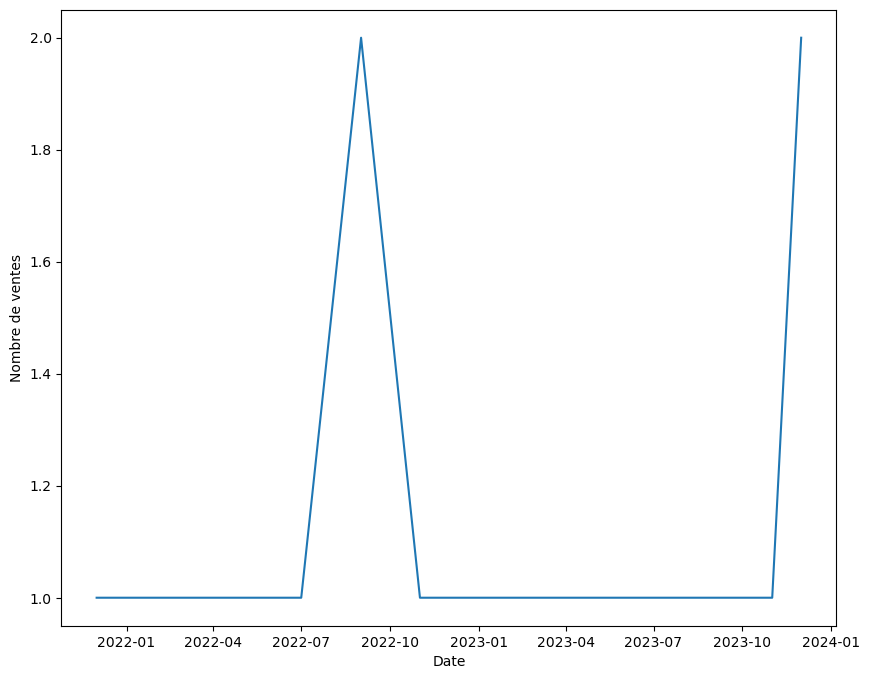

In [23]:
### Graphique linéaire
plt.figure(figsize=(10,8))
plt.plot(coppa_df["Date"], coppa_df["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller  # Importation de la fonction adfuller
# Fonction pour effectuer le test ADF et différencier la série jusqu'à ce qu'elle soit stationnaire
def test_stationarity(series, diff_count=0):
    vente_result = adfuller(series)
    print(f"\nRésultats du test ADF pour la série temporelle:")
    print(f"Statistique ADF : {vente_result[0]}")
    print(f'p-value : {vente_result[1]}')
    print(f'Nombre de lags utilisés : {vente_result[2]}')
    print(f'Nombre d\'observations utilisées : {vente_result[3]}')
    print(f'Valeurs critiques :')
    for key, value in vente_result[4].items():
        print(f'\t{key}: {value}')

    # Interprétation
    if vente_result[1] < 0.05:
        print(f"La série temporelle est stationnaire après {diff_count} différenciations.")
        return series
    else:
        print("La série temporelle n'est pas stationnaire. Différenciation en cours...")
        # Différenciation
        diff_series = series.diff().dropna()
        return test_stationarity(diff_series, diff_count + 1)
    
    
print("Avant différentiation")
print(coppa_df['Nombre de ventes'])

# Test sur le nombre de ventes
ventes_stationnaires = test_stationarity(coppa_df['Nombre de ventes'])

print("Après différentiation")
print(ventes_stationnaires)

Avant différentiation
0     1
1     1
2     1
3     1
4     2
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    2
Name: Nombre de ventes, dtype: int64

Résultats du test ADF pour la série temporelle:
Statistique ADF : -2.7971546389275783
p-value : 0.05868135852489529
Nombre de lags utilisés : 0
Nombre d'observations utilisées : 12
Valeurs critiques :
	1%: -4.137829282407408
	5%: -3.1549724074074077
	10%: -2.7144769444444443
La série temporelle n'est pas stationnaire. Différenciation en cours...

Résultats du test ADF pour la série temporelle:
Statistique ADF : -4.100161064484781
p-value : 0.0009679309516910713
Nombre de lags utilisés : 0
Nombre d'observations utilisées : 11
Valeurs critiques :
	1%: -4.223238279489106
	5%: -3.189368925619835
	10%: -2.729839421487603
La série temporelle est stationnaire après 1 différenciations.
Après différentiation
1     0.0
2     0.0
3     0.0
4     1.0
5    -1.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    1.0
Name: N

In [25]:
# Convertir la série en DataFrame
ventes_stationnaires_df = ventes_stationnaires.to_frame()

# Ajouter la colonne "Date" du DataFrame coppa_df
ventes_stationnaires_df['Date'] = coppa_df['Date']

# Afficher le DataFrame
ventes_stationnaires_df

,Nombre de ventes,Date
1,0.0,2022-01-01
2,0.0,2022-06-01
3,0.0,2022-07-01
4,1.0,2022-09-01
5,-1.0,2022-11-01
6,0.0,2022-12-01
7,0.0,2023-01-01
8,0.0,2023-05-01
9,0.0,2023-08-01
10,0.0,2023-09-01


In [26]:
# surchetillonnage des donnees

# Définir la colonne 'Date' comme index
ventes_stationnaires_df.set_index('Date', inplace=True)

# Rééchantillonnage avec une fréquence plus élevée
df_resampled = ventes_stationnaires_df.resample('D').interpolate(method='linear')

# Réinitialiser l'index
df_resampled = df_resampled.reset_index()

# Afficher le DataFrame avec le sur-échantillonnage
df_resampled

,Date,Nombre de ventes
0,2022-01-01,0.000000
1,2022-01-02,0.000000
2,2022-01-03,0.000000
3,2022-01-04,0.000000
4,2022-01-05,0.000000
...,...,...
695,2023-11-27,0.866667
696,2023-11-28,0.900000
697,2023-11-29,0.933333
698,2023-11-30,0.966667


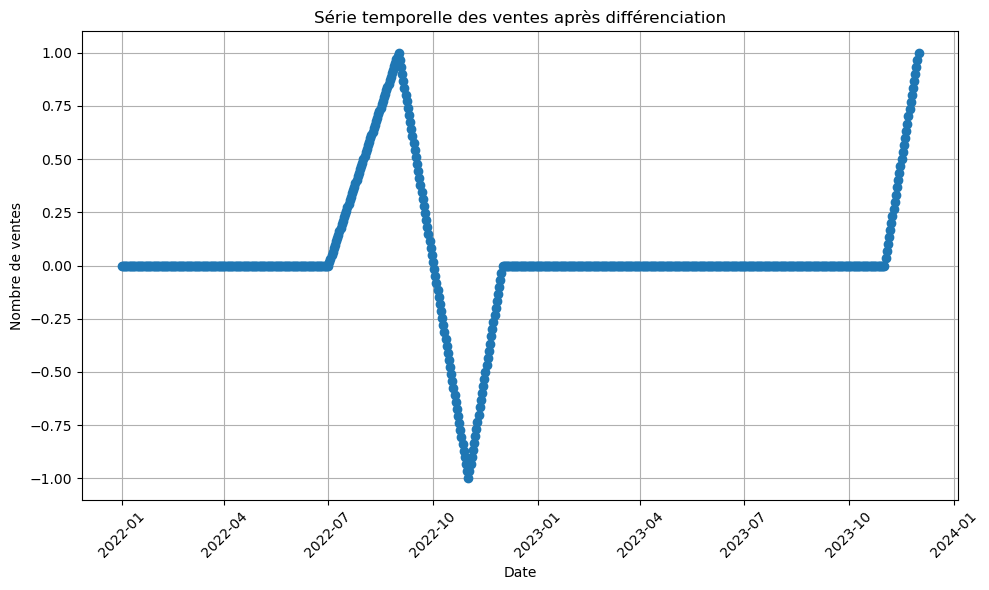

In [27]:
import matplotlib.pyplot as plt

# Tracer la série temporelle
plt.figure(figsize=(10, 6))
plt.plot(df_resampled['Date'], df_resampled['Nombre de ventes'], marker='o', linestyle='-')
plt.title('Série temporelle des ventes après différenciation')
plt.xlabel('Date')
plt.ylabel('Nombre de ventes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
# import itertools
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# import warnings
# warnings.filterwarnings('ignore')

# # Assurez-vous que coppa_df est défini

# # Paramètre d
# d = 0

# # Créer une liste des combinaisons possibles de p et q
# p = q = range(0, 7)
# pdq = list(itertools.product(p, q))

# # Initialiser les listes pour stocker les résultats
# results = []
# aic_values = []

# # Boucle sur toutes les combinaisons de p et q
# for param in pdq:
#     try:
#         model = ARIMA(df_resampled['Nombre de ventes'], order=(param[0], d, param[1]))
#         fitted_model = model.fit()
#         results.append(fitted_model)
#         aic_values.append(fitted_model.aic)
#     except:
#         continue

# # Trouver les ordres p et q qui minimisent l'AIC
# best_index = np.argmin(aic_values)
# best_model = results[best_index]
# best_pq = pdq[best_index]

# # Afficher les paramètres de la meilleure combinaison et la valeur de l'AIC minimale
# print(f"Meilleure combinaison d'ordres p, d et q: {best_pq[0]},{d},{best_pq[1]}")
# print(f"Valeur de l'AIC minimale: {best_model.aic}")

In [29]:
# Séparer les données d'entraînement et de test
train_data = df_resampled[df_resampled['Date'].dt.year != 2023]
test_data = df_resampled[df_resampled['Date'].dt.year >= 2023]

In [30]:
from statsmodels.tsa.arima.model import ARIMA

# Définir l'ordre du modèle ARIMA
order = (2,0,0)

# Entraîner le modèle ARIMA sur la série stationnaire
model = ARIMA(train_data['Nombre de ventes'], order=order)
model_fit_coppa = model.fit()

# Stocker le modèle dans un dictionnaire avec la clé "coppa"
trained_models = {"coppa": model_fit_coppa}

# Résumé du modèle
print(model_fit_coppa.summary())

                               SARIMAX Results                                
Dep. Variable:       Nombre de ventes   No. Observations:                  365
Model:                 ARIMA(2, 0, 0)   Log Likelihood                1440.314
Date:                Wed, 27 Mar 2024   AIC                          -2872.628
Time:                        11:21:00   BIC                          -2857.028
Sample:                             0   HQIC                         -2866.428
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0438      0.112      0.390      0.696      -0.176       0.264
ar.L1          1.9635      0.024     82.346      0.000       1.917       2.010
ar.L2         -0.9658      0.024    -40.946      0.0

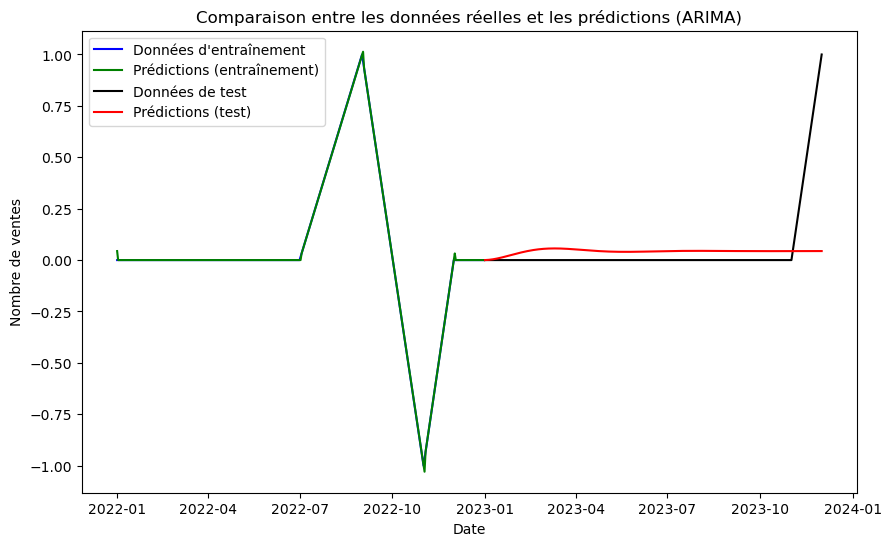

In [31]:
# Prédictions sur les données d'entraînement
train_predictions = model_fit_coppa.predict(start=train_data.index.min(), end=train_data.index.max(), typ='levels')

# Prédictions sur les données de test
test_predictions = model_fit_coppa.forecast(steps=len(test_data))

# Plot
plt.figure(figsize=(10, 6))

# Données d'entraînement
plt.plot(train_data['Date'], train_data['Nombre de ventes'], label='Données d\'entraînement', color='blue')

# Prédictions sur les données d'entraînement
plt.plot(train_data['Date'], train_predictions, label='Prédictions (entraînement)', color='green')

# Données de test
plt.plot(test_data['Date'], test_data['Nombre de ventes'], label='Données de test', color='black')

# Prédictions sur les données de test
plt.plot(test_data['Date'], test_predictions, label='Prédictions (test)', color='red')

plt.title('Comparaison entre les données réelles et les prédictions (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Nombre de ventes')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculer RMSE pour les données d'entraînement
train_rmse = np.sqrt(mean_squared_error(train_data['Nombre de ventes'], train_predictions))

# Calculer RMSE pour les données de test
test_rmse = np.sqrt(mean_squared_error(test_data['Nombre de ventes'], test_predictions))

print("RMSE pour les données d'entraînement:", train_rmse)
print("RMSE pour les données de test:", test_rmse)

RMSE pour les données d'entraînement: 0.00514440148480292
RMSE pour les données de test: 0.17082683391951856


# Saucisson à la pistache

In [33]:
# Accéder au DataFrame spécifique pour le produit 'Coppa'
Saucisson_à_la_pistache_df = sous_dataframes['Saucisson à la pistache']
Saucisson_à_la_pistache_df.reset_index(drop=True, inplace=True)
Saucisson_à_la_pistache_df

,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Saucisson à la pistache,1,1800.0,1800.000000,2021-02-01
1,Saucisson à la pistache,1,1400.0,1400.000000,2021-12-01
2,Saucisson à la pistache,1,1400.0,1400.000000,2022-02-01
3,Saucisson à la pistache,3,4600.0,1533.333333,2022-03-01
4,Saucisson à la pistache,2,3200.0,1600.000000,2022-04-01
5,Saucisson à la pistache,1,1800.0,1800.000000,2022-05-01
6,Saucisson à la pistache,1,1800.0,1800.000000,2022-06-01
7,Saucisson à la pistache,1,1800.0,1800.000000,2023-11-01
8,Saucisson à la pistache,3,4200.0,1400.000000,2023-12-01
9,Saucisson à la pistache,2,3200.0,1600.000000,2024-01-01


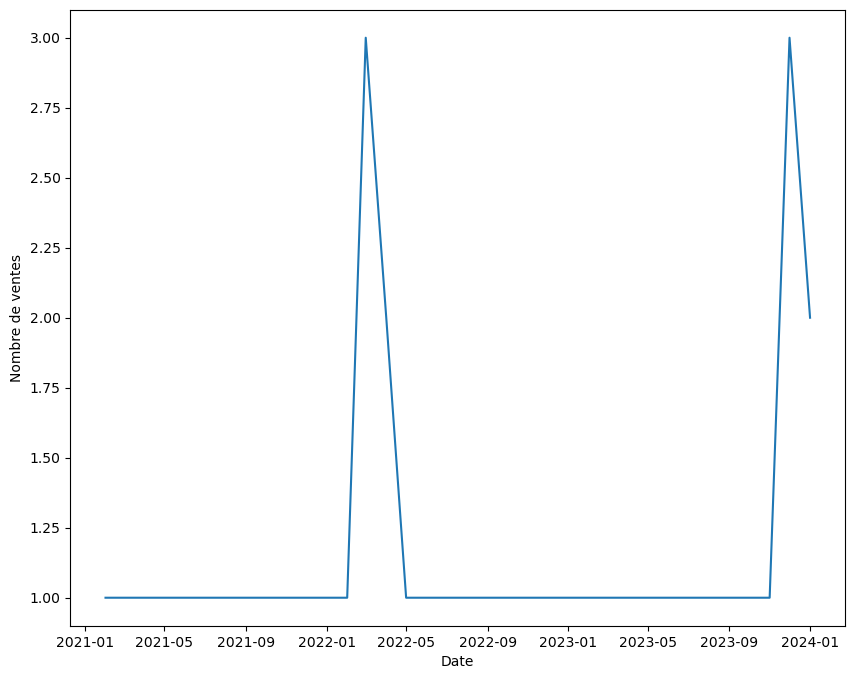

In [34]:
### Graphique linéaire
plt.figure(figsize=(10,8))
plt.plot(Saucisson_à_la_pistache_df["Date"], Saucisson_à_la_pistache_df["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

In [35]:
from statsmodels.tsa.stattools import adfuller  # Importation de la fonction adfuller
# Fonction pour effectuer le test ADF et différencier la série jusqu'à ce qu'elle soit stationnaire
def test_stationarity(series, diff_count=0):
    vente_result = adfuller(series)
    print(f"\nRésultats du test ADF pour la série temporelle:")
    print(f"Statistique ADF : {vente_result[0]}")
    print(f'p-value : {vente_result[1]}')
    print(f'Nombre de lags utilisés : {vente_result[2]}')
    print(f'Nombre d\'observations utilisées : {vente_result[3]}')
    print(f'Valeurs critiques :')
    for key, value in vente_result[4].items():
        print(f'\t{key}: {value}')

    # Interprétation
    if vente_result[1] < 0.05:
        print(f"La série temporelle est stationnaire après {diff_count} différenciations.")
        return series
    else:
        print("La série temporelle n'est pas stationnaire. Différenciation en cours...")
        # Différenciation
        diff_series = series.diff().dropna()
        return test_stationarity(diff_series, diff_count + 1)
    
    
print("Avant différentiation")
print(Saucisson_à_la_pistache_df['Nombre de ventes'])

# Test sur le nombre de ventes
ventes_stationnaires = test_stationarity(Saucisson_à_la_pistache_df['Nombre de ventes'])

print("Après différentiation")
print(ventes_stationnaires)

Avant différentiation
0    1
1    1
2    1
3    3
4    2
5    1
6    1
7    1
8    3
9    2
Name: Nombre de ventes, dtype: int64

Résultats du test ADF pour la série temporelle:
Statistique ADF : -210237058279962.47
p-value : 0.0
Nombre de lags utilisés : 3
Nombre d'observations utilisées : 6
Valeurs critiques :
	1%: -5.354256481481482
	5%: -3.6462381481481483
	10%: -2.901197777777778
La série temporelle est stationnaire après 0 différenciations.
Après différentiation
0    1
1    1
2    1
3    3
4    2
5    1
6    1
7    1
8    3
9    2
Name: Nombre de ventes, dtype: int64


In [36]:
# Convertir la série en DataFrame
ventes_stationnaires_df = ventes_stationnaires.to_frame()

# Ajouter la colonne "Date" du DataFrame coppa_df
ventes_stationnaires_df['Date'] = Saucisson_à_la_pistache_df['Date']

# Afficher le DataFrame
ventes_stationnaires_df

,Nombre de ventes,Date
0,1,2021-02-01
1,1,2021-12-01
2,1,2022-02-01
3,3,2022-03-01
4,2,2022-04-01
5,1,2022-05-01
6,1,2022-06-01
7,1,2023-11-01
8,3,2023-12-01
9,2,2024-01-01


In [37]:
# surchetillonnage des donnees

# Définir la colonne 'Date' comme index
ventes_stationnaires_df.set_index('Date', inplace=True)

# Rééchantillonnage avec une fréquence plus élevée
df_resampled = ventes_stationnaires_df.resample('D').interpolate(method='linear')

# Réinitialiser l'index
df_resampled = df_resampled.reset_index()

# Afficher le DataFrame avec le sur-échantillonnage
df_resampled

,Date,Nombre de ventes
0,2021-02-01,1.000000
1,2021-02-02,1.000000
2,2021-02-03,1.000000
3,2021-02-04,1.000000
4,2021-02-05,1.000000
...,...,...
1060,2023-12-28,2.129032
1061,2023-12-29,2.096774
1062,2023-12-30,2.064516
1063,2023-12-31,2.032258


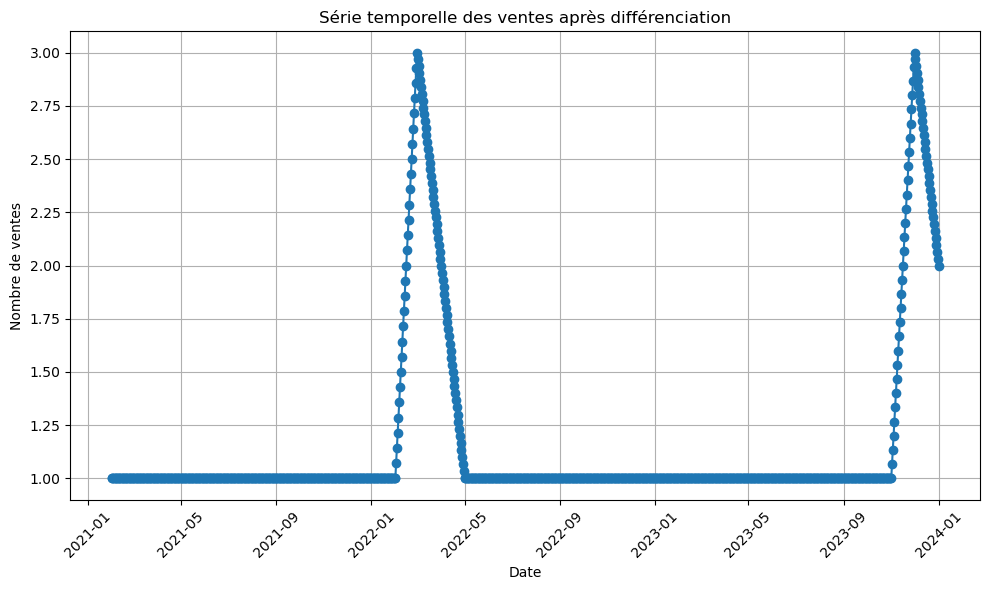

In [38]:
import matplotlib.pyplot as plt

# Tracer la série temporelle
plt.figure(figsize=(10, 6))
plt.plot(df_resampled['Date'], df_resampled['Nombre de ventes'], marker='o', linestyle='-')
plt.title('Série temporelle des ventes après différenciation')
plt.xlabel('Date')
plt.ylabel('Nombre de ventes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
# import itertools
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# import warnings
# warnings.filterwarnings('ignore')

# # Assurez-vous que coppa_df est défini

# # Paramètre d
# d = 0

# # Créer une liste des combinaisons possibles de p et q
# p = q = range(0, 7)
# pdq = list(itertools.product(p, q))

# # Initialiser les listes pour stocker les résultats
# results = []
# aic_values = []

# # Boucle sur toutes les combinaisons de p et q
# for param in pdq:
#     try:
#         model = ARIMA(df_resampled['Nombre de ventes'], order=(param[0], d, param[1]))
#         fitted_model = model.fit()
#         results.append(fitted_model)
#         aic_values.append(fitted_model.aic)
#     except:
#         continue

# # Trouver les ordres p et q qui minimisent l'AIC
# best_index = np.argmin(aic_values)
# best_model = results[best_index]
# best_pq = pdq[best_index]

# # Afficher les paramètres de la meilleure combinaison et la valeur de l'AIC minimale
# print(f"Meilleure combinaison d'ordres p, d et q: {best_pq[0]},{d},{best_pq[1]}")
# print(f"Valeur de l'AIC minimale: {best_model.aic}")

In [40]:
# Séparer les données d'entraînement et de test
train_data = df_resampled[df_resampled['Date'].dt.year != 2023]
test_data = df_resampled[df_resampled['Date'].dt.year >= 2023]

In [41]:
from statsmodels.tsa.arima.model import ARIMA

# Définir l'ordre du modèle ARIMA
order = (2,0,0)

# Entraîner le modèle ARIMA sur la série stationnaire
model = ARIMA(train_data['Nombre de ventes'], order=order)
model_fit_Saucisson_à_la_pistache = model.fit()

# Stocker le modèle dans un dictionnaire avec la clé "coppa"
trained_models = {
    "coppa": model_fit_coppa,
    "Saucisson à la pistache": model_fit_Saucisson_à_la_pistache
}
trained_models = {}
# Résumé du modèle
print(model_fit_Saucisson_à_la_pistache.summary())

                               SARIMAX Results                                
Dep. Variable:       Nombre de ventes   No. Observations:                  700
Model:                 ARIMA(2, 0, 0)   Log Likelihood                1288.756
Date:                Wed, 27 Mar 2024   AIC                          -2569.513
Time:                        11:21:01   BIC                          -2551.308
Sample:                             0   HQIC                         -2562.476
                                - 700                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1293      4.098      0.276      0.783      -6.902       9.161
ar.L1          1.9578      0.072     27.164      0.000       1.817       2.099
ar.L2         -0.9608      0.077    -12.415      0.0

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [42]:
# # Prédictions sur les données d'entraînement
# train_predictions = model_fit_Saucisson_à_la_pistache.predict(start=train_data.index.min(), end=train_data.index.max(), typ='levels')

# # Prédictions sur les données de test
# test_predictions = model_fit_Saucisson_à_la_pistache.forecast(steps=len(test_data))

# # Plot
# plt.figure(figsize=(10, 6))

# # Données d'entraînement
# plt.plot(train_data['Date'], train_data['Nombre de ventes'], label='Données d\'entraînement', color='blue')

# # Prédictions sur les données d'entraînement
# plt.plot(train_data['Date'], train_predictions, label='Prédictions (entraînement)', color='green')

# # Données de test
# plt.plot(test_data['Date'], test_data['Nombre de ventes'], label='Données de test', color='black')

# # Prédictions sur les données de test
# plt.plot(test_data['Date'], test_predictions, label='Prédictions (test)', color='red')

# plt.title('Comparaison entre les données réelles et les prédictions (ARIMA)')
# plt.xlabel('Date')
# plt.ylabel('Nombre de ventes')
# plt.legend()
# plt.show()

In [43]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculer RMSE pour les données d'entraînement
train_predictions = model_fit_Saucisson_à_la_pistache.predict(start=0, end=len(train_data)-1)
train_rmse = np.sqrt(mean_squared_error(train_data['Nombre de ventes'], train_predictions))

# Calculer RMSE pour les données de test
test_predictions = model_fit_Saucisson_à_la_pistache.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
test_rmse = np.sqrt(mean_squared_error(test_data['Nombre de ventes'], test_predictions))

print("RMSE pour les données d'entraînement:", train_rmse)
print("RMSE pour les données de test:", test_rmse)


RMSE pour les données d'entraînement: 0.03840214588329761
RMSE pour les données de test: 3.4221439716300153


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Sérum hydratant Vichy

In [44]:
# Accéder au DataFrame spécifique pour un produit 
Sérum_hydratant_Vichy_df = sous_dataframes['Sérum hydratant Vichy']
Sérum_hydratant_Vichy_df.reset_index(drop=True, inplace=True)
Sérum_hydratant_Vichy_df

,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Sérum hydratant Vichy,1,3000.0,3000.0,2022-01-01
1,Sérum hydratant Vichy,2,6000.0,3000.0,2022-05-01
2,Sérum hydratant Vichy,2,6000.0,3000.0,2022-07-01
3,Sérum hydratant Vichy,1,3000.0,3000.0,2022-08-01
4,Sérum hydratant Vichy,1,3000.0,3000.0,2022-09-01
5,Sérum hydratant Vichy,1,3000.0,3000.0,2022-10-01
6,Sérum hydratant Vichy,1,3000.0,3000.0,2022-11-01
7,Sérum hydratant Vichy,1,3000.0,3000.0,2023-01-01
8,Sérum hydratant Vichy,1,3000.0,3000.0,2023-09-01
9,Sérum hydratant Vichy,2,6000.0,3000.0,2023-11-01


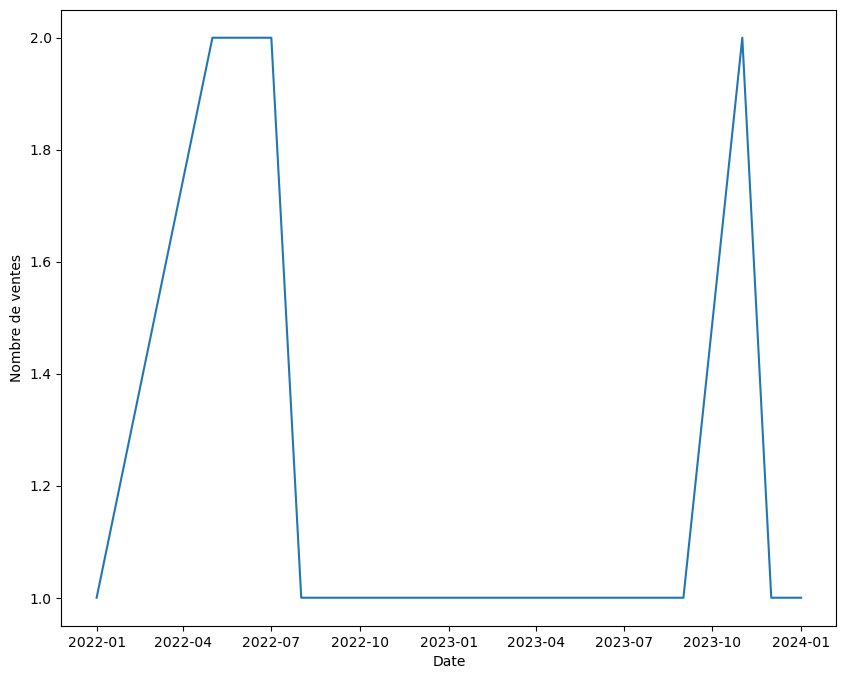

In [45]:
### Graphique linéaire
plt.figure(figsize=(10,8))
plt.plot(Sérum_hydratant_Vichy_df["Date"], Sérum_hydratant_Vichy_df["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

In [46]:
from statsmodels.tsa.stattools import adfuller  # Importation de la fonction adfuller
# Fonction pour effectuer le test ADF et différencier la série jusqu'à ce qu'elle soit stationnaire
def test_stationarity(series, diff_count=0):
    vente_result = adfuller(series)
    print(f"\nRésultats du test ADF pour la série temporelle:")
    print(f"Statistique ADF : {vente_result[0]}")
    print(f'p-value : {vente_result[1]}')
    print(f'Nombre de lags utilisés : {vente_result[2]}')
    print(f'Nombre d\'observations utilisées : {vente_result[3]}')
    print(f'Valeurs critiques :')
    for key, value in vente_result[4].items():
        print(f'\t{key}: {value}')

    # Interprétation
    if vente_result[1] < 0.05:
        print(f"La série temporelle est stationnaire après {diff_count} différenciations.")
        return series
    else:
        print("La série temporelle n'est pas stationnaire. Différenciation en cours...")
        # Différenciation
        diff_series = series.diff().dropna()
        return test_stationarity(diff_series, diff_count + 1)
    
    
print("Avant différentiation")
print(Sérum_hydratant_Vichy_df['Nombre de ventes'])

# Test sur le nombre de ventes
ventes_stationnaires = test_stationarity(Sérum_hydratant_Vichy_df['Nombre de ventes'])

print("Après différentiation")
print(ventes_stationnaires)

Avant différentiation
0     1
1     2
2     2
3     1
4     1
5     1
6     1
7     1
8     1
9     2
10    1
11    1
Name: Nombre de ventes, dtype: int64

Résultats du test ADF pour la série temporelle:
Statistique ADF : -2.7595986330234
p-value : 0.06428057477996418
Nombre de lags utilisés : 0
Nombre d'observations utilisées : 11
Valeurs critiques :
	1%: -4.223238279489106
	5%: -3.189368925619835
	10%: -2.729839421487603
La série temporelle n'est pas stationnaire. Différenciation en cours...

Résultats du test ADF pour la série temporelle:
Statistique ADF : -4.343722427630694
p-value : 0.0003728295050814064
Nombre de lags utilisés : 0
Nombre d'observations utilisées : 10
Valeurs critiques :
	1%: -4.331573
	5%: -3.23295
	10%: -2.7487
La série temporelle est stationnaire après 1 différenciations.
Après différentiation
1     1.0
2     0.0
3    -1.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     1.0
10   -1.0
11    0.0
Name: Nombre de ventes, dtype: float64


In [47]:
# Convertir la série en DataFrame
ventes_stationnaires_df = ventes_stationnaires.to_frame()

# Ajouter la colonne "Date" du DataFrame coppa_df
ventes_stationnaires_df['Date'] = Sérum_hydratant_Vichy_df['Date']

# Afficher le DataFrame
ventes_stationnaires_df

,Nombre de ventes,Date
1,1.0,2022-05-01
2,0.0,2022-07-01
3,-1.0,2022-08-01
4,0.0,2022-09-01
5,0.0,2022-10-01
6,0.0,2022-11-01
7,0.0,2023-01-01
8,0.0,2023-09-01
9,1.0,2023-11-01
10,-1.0,2023-12-01


In [48]:
# surchetillonnage des donnees

# Définir la colonne 'Date' comme index
ventes_stationnaires_df.set_index('Date', inplace=True)

# Rééchantillonnage avec une fréquence plus élevée
df_resampled = ventes_stationnaires_df.resample('D').interpolate(method='linear')

# Réinitialiser l'index
df_resampled = df_resampled.reset_index()

# Afficher le DataFrame avec le sur-échantillonnage
df_resampled

,Date,Nombre de ventes
0,2022-05-01,1.000000
1,2022-05-02,0.983607
2,2022-05-03,0.967213
3,2022-05-04,0.950820
4,2022-05-05,0.934426
...,...,...
606,2023-12-28,-0.129032
607,2023-12-29,-0.096774
608,2023-12-30,-0.064516
609,2023-12-31,-0.032258


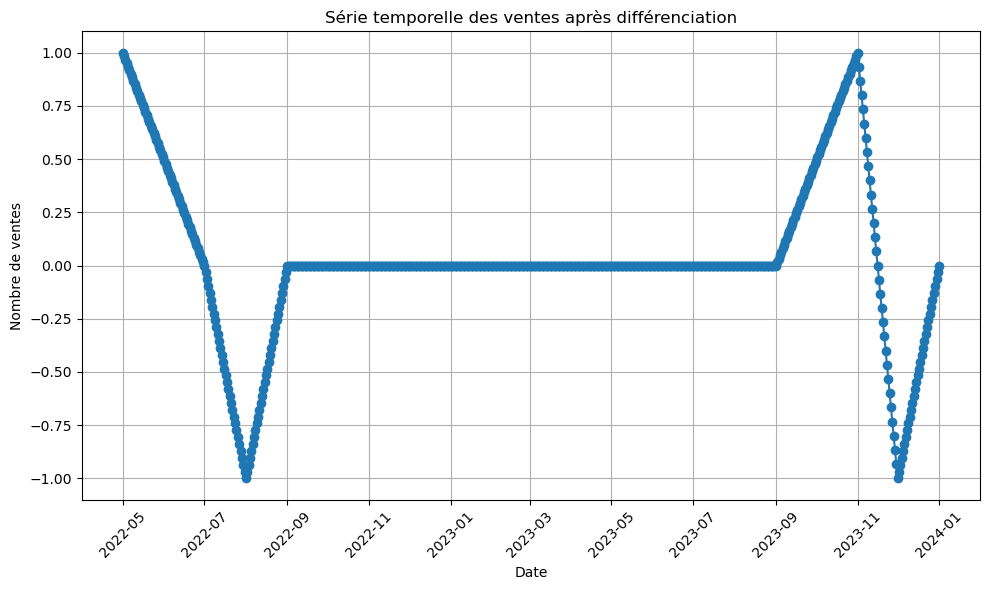

In [49]:
import matplotlib.pyplot as plt

# Tracer la série temporelle
plt.figure(figsize=(10, 6))
plt.plot(df_resampled['Date'], df_resampled['Nombre de ventes'], marker='o', linestyle='-')
plt.title('Série temporelle des ventes après différenciation')
plt.xlabel('Date')
plt.ylabel('Nombre de ventes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:
# import itertools
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# import warnings
# warnings.filterwarnings('ignore')

# # Assurez-vous que coppa_df est défini

# # Paramètre d
# d = 0

# # Créer une liste des combinaisons possibles de p et q
# p = q = range(0, 7)
# pdq = list(itertools.product(p, q))

# # Initialiser les listes pour stocker les résultats
# results = []
# aic_values = []

# # Boucle sur toutes les combinaisons de p et q
# for param in pdq:
#     try:
#         model = ARIMA(df_resampled['Nombre de ventes'], order=(param[0], d, param[1]))
#         fitted_model = model.fit()
#         results.append(fitted_model)
#         aic_values.append(fitted_model.aic)
#     except:
#         continue

# # Trouver les ordres p et q qui minimisent l'AIC
# best_index = np.argmin(aic_values)
# best_model = results[best_index]
# best_pq = pdq[best_index]

# # Afficher les paramètres de la meilleure combinaison et la valeur de l'AIC minimale
# print(f"Meilleure combinaison d'ordres p, d et q: {best_pq[0]},{d},{best_pq[1]}")
# print(f"Valeur de l'AIC minimale: {best_model.aic}")

In [51]:
# Séparer les données d'entraînement et de test
train_data = df_resampled[df_resampled['Date'].dt.year != 2023]
test_data = df_resampled[df_resampled['Date'].dt.year >= 2023]

In [52]:
from statsmodels.tsa.arima.model import ARIMA

# Définir l'ordre du modèle ARIMA
order = (2,0,0)

# Entraîner le modèle ARIMA sur la série stationnaire
model = ARIMA(train_data['Nombre de ventes'], order=order)
model_fit_Sérum_hydratant_Vichy = model.fit()

# Stocker le modèle dans un dictionnaire avec la clé "coppa"
trained_models = {
    "coppa": model_fit_coppa,
    "Saucisson à la pistache": model_fit_Saucisson_à_la_pistache,
    "Sérum hydratant Vichy": model_fit_Sérum_hydratant_Vichy,
}
# Résumé du modèle
print(model_fit_Sérum_hydratant_Vichy.summary())

                               SARIMAX Results                                
Dep. Variable:       Nombre de ventes   No. Observations:                  246
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 964.763
Date:                Wed, 27 Mar 2024   AIC                          -1921.527
Time:                        11:21:02   BIC                          -1907.505
Sample:                             0   HQIC                         -1915.881
                                - 246                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.87e-07      0.183   2.11e-06      1.000      -0.359       0.359
ar.L1          1.9504      0.027     73.516      0.000       1.898       2.002
ar.L2         -0.9525      0.027    -35.100      0.0

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [53]:
# # Prédictions sur les données d'entraînement
# train_predictions = model_fit_Sérum_hydratant_Vichy.predict(start=train_data.index.min(), end=train_data.index.max(), typ='levels')

# # Prédictions sur les données de test
# test_predictions = model_fit_Sérum_hydratant_Vichy.forecast(steps=len(test_data))

# # Plot
# plt.figure(figsize=(10, 6))

# # Données d'entraînement
# plt.plot(train_data['Date'], train_data['Nombre de ventes'], label='Données d\'entraînement', color='blue')

# # Prédictions sur les données d'entraînement
# plt.plot(train_data['Date'], train_predictions, label='Prédictions (entraînement)', color='green')

# # Données de test
# plt.plot(test_data['Date'], test_data['Nombre de ventes'], label='Données de test', color='black')

# # Prédictions sur les données de test
# plt.plot(test_data['Date'], test_predictions, label='Prédictions (test)', color='red')

# plt.title('Comparaison entre les données réelles et les prédictions (ARIMA)')
# plt.xlabel('Date')
# plt.ylabel('Nombre de ventes')
# plt.legend()
# plt.show()

In [54]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculer RMSE pour les données d'entraînement
train_predictions = model_fit_Sérum_hydratant_Vichy.predict(start=0, end=len(train_data)-1)
train_rmse = np.sqrt(mean_squared_error(train_data['Nombre de ventes'], train_predictions))

# Calculer RMSE pour les données de test
test_predictions = model_fit_Sérum_hydratant_Vichy.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
test_rmse = np.sqrt(mean_squared_error(test_data['Nombre de ventes'], test_predictions))

print("RMSE pour les données d'entraînement:", train_rmse)
print("RMSE pour les données de test:", test_rmse)


RMSE pour les données d'entraînement: 0.06393005102853894
RMSE pour les données de test: 0.3334575691406487


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Rillettes d'oie

In [55]:
# Accéder au DataFrame spécifique pour le produit 'Coppa'
Rillettes_doie_df = sous_dataframes['Rillettes d\'oie']
Rillettes_doie_df.reset_index(drop=True, inplace=True)
Rillettes_doie_df

,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Rillettes d'oie,1,1500.0,1500.0,2022-02-01
1,Rillettes d'oie,2,3000.0,1500.0,2022-03-01
2,Rillettes d'oie,1,1500.0,1500.0,2022-06-01
3,Rillettes d'oie,2,3000.0,1500.0,2022-09-01
4,Rillettes d'oie,2,3000.0,1500.0,2022-11-01
5,Rillettes d'oie,1,1500.0,1500.0,2022-12-01
6,Rillettes d'oie,1,1500.0,1500.0,2023-01-01
7,Rillettes d'oie,1,1500.0,1500.0,2023-03-01
8,Rillettes d'oie,1,1500.0,1500.0,2023-06-01
9,Rillettes d'oie,1,1500.0,1500.0,2023-09-01


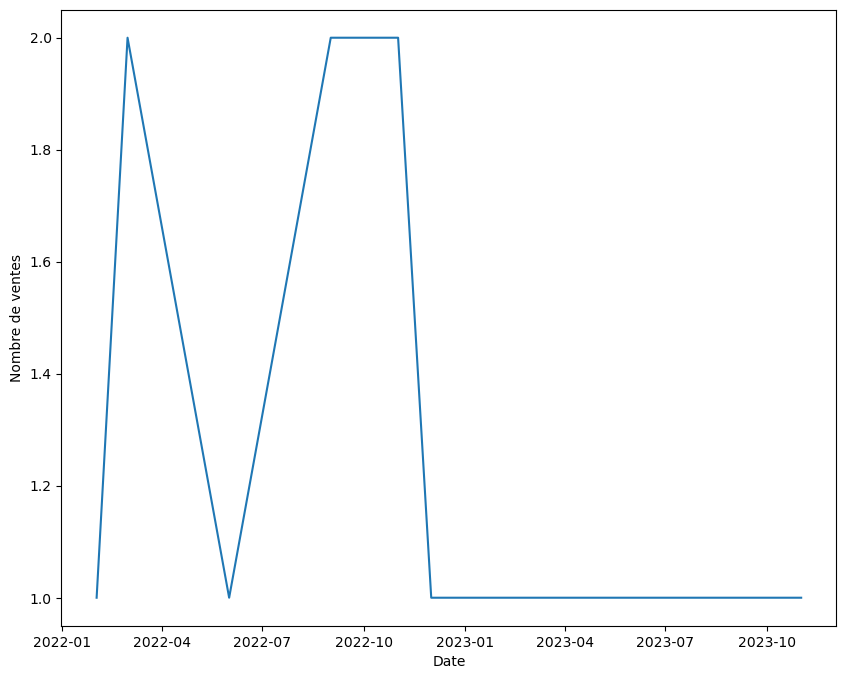

In [56]:
### Graphique linéaire
plt.figure(figsize=(10,8))
plt.plot(Rillettes_doie_df["Date"], Rillettes_doie_df["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

In [57]:
from statsmodels.tsa.stattools import adfuller  # Importation de la fonction adfuller
# Fonction pour effectuer le test ADF et différencier la série jusqu'à ce qu'elle soit stationnaire
def test_stationarity(series, diff_count=0):
    vente_result = adfuller(series)
    print(f"\nRésultats du test ADF pour la série temporelle:")
    print(f"Statistique ADF : {vente_result[0]}")
    print(f'p-value : {vente_result[1]}')
    print(f'Nombre de lags utilisés : {vente_result[2]}')
    print(f'Nombre d\'observations utilisées : {vente_result[3]}')
    print(f'Valeurs critiques :')
    for key, value in vente_result[4].items():
        print(f'\t{key}: {value}')

    # Interprétation
    if vente_result[1] < 0.05:
        print(f"La série temporelle est stationnaire après {diff_count} différenciations.")
        return series
    else:
        print("La série temporelle n'est pas stationnaire. Différenciation en cours...")
        # Différenciation
        diff_series = series.diff().dropna()
        return test_stationarity(diff_series, diff_count + 1)
    
    
print("Avant différentiation")
print(Rillettes_doie_df['Nombre de ventes'])

# Test sur le nombre de ventes
ventes_stationnaires = test_stationarity(Rillettes_doie_df['Nombre de ventes'])

print("Après différentiation")
print(ventes_stationnaires)

Avant différentiation
0     1
1     2
2     1
3     2
4     2
5     1
6     1
7     1
8     1
9     1
10    1
11    1
Name: Nombre de ventes, dtype: int64

Résultats du test ADF pour la série temporelle:
Statistique ADF : -2.759598633023399
p-value : 0.06428057477996436
Nombre de lags utilisés : 0
Nombre d'observations utilisées : 11
Valeurs critiques :
	1%: -4.223238279489106
	5%: -3.189368925619835
	10%: -2.729839421487603
La série temporelle n'est pas stationnaire. Différenciation en cours...

Résultats du test ADF pour la série temporelle:
Statistique ADF : -2.294157338705617
p-value : 0.17385927093725118
Nombre de lags utilisés : 3
Nombre d'observations utilisées : 7
Valeurs critiques :
	1%: -4.9386902332361515
	5%: -3.477582857142857
	10%: -2.8438679591836733
La série temporelle n'est pas stationnaire. Différenciation en cours...

Résultats du test ADF pour la série temporelle:
Statistique ADF : -7.071067811865478
p-value : 4.935787430787981e-10
Nombre de lags utilisés : 3
Nombre

In [58]:
# Convertir la série en DataFrame
ventes_stationnaires_df = ventes_stationnaires.to_frame()

# Ajouter la colonne "Date" du DataFrame coppa_df
ventes_stationnaires_df['Date'] = Rillettes_doie_df['Date']

# Afficher le DataFrame
ventes_stationnaires_df

,Nombre de ventes,Date
2,-2.0,2022-06-01
3,2.0,2022-09-01
4,-1.0,2022-11-01
5,-1.0,2022-12-01
6,1.0,2023-01-01
7,0.0,2023-03-01
8,0.0,2023-06-01
9,0.0,2023-09-01
10,0.0,2023-10-01
11,0.0,2023-11-01


In [59]:
# surchetillonnage des donnees

# Définir la colonne 'Date' comme index
ventes_stationnaires_df.set_index('Date', inplace=True)

# Rééchantillonnage avec une fréquence plus élevée
df_resampled = ventes_stationnaires_df.resample('D').interpolate(method='linear')

# Réinitialiser l'index
df_resampled = df_resampled.reset_index()

# Afficher le DataFrame avec le sur-échantillonnage
df_resampled

,Date,Nombre de ventes
0,2022-06-01,-2.000000
1,2022-06-02,-1.956522
2,2022-06-03,-1.913043
3,2022-06-04,-1.869565
4,2022-06-05,-1.826087
...,...,...
514,2023-10-28,0.000000
515,2023-10-29,0.000000
516,2023-10-30,0.000000
517,2023-10-31,0.000000


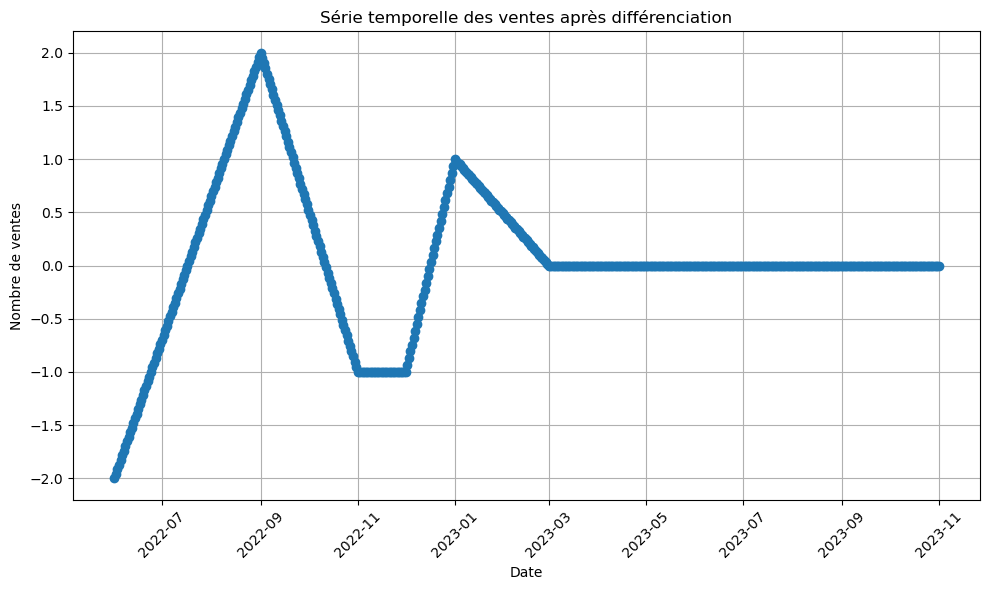

In [60]:
import matplotlib.pyplot as plt

# Tracer la série temporelle
plt.figure(figsize=(10, 6))
plt.plot(df_resampled['Date'], df_resampled['Nombre de ventes'], marker='o', linestyle='-')
plt.title('Série temporelle des ventes après différenciation')
plt.xlabel('Date')
plt.ylabel('Nombre de ventes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [61]:
# import itertools
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# import warnings
# warnings.filterwarnings('ignore')

# # Assurez-vous que coppa_df est défini

# # Paramètre d
# d = 0

# # Créer une liste des combinaisons possibles de p et q
# p = q = range(0, 7)
# pdq = list(itertools.product(p, q))

# # Initialiser les listes pour stocker les résultats
# results = []
# aic_values = []

# # Boucle sur toutes les combinaisons de p et q
# for param in pdq:
#     try:
#         model = ARIMA(df_resampled['Nombre de ventes'], order=(param[0], d, param[1]))
#         fitted_model = model.fit()
#         results.append(fitted_model)
#         aic_values.append(fitted_model.aic)
#     except:
#         continue

# # Trouver les ordres p et q qui minimisent l'AIC
# best_index = np.argmin(aic_values)
# best_model = results[best_index]
# best_pq = pdq[best_index]

# # Afficher les paramètres de la meilleure combinaison et la valeur de l'AIC minimale
# print(f"Meilleure combinaison d'ordres p, d et q: {best_pq[0]},{d},{best_pq[1]}")
# print(f"Valeur de l'AIC minimale: {best_model.aic}")

In [62]:
# Séparer les données d'entraînement et de test
train_data = df_resampled[df_resampled['Date'].dt.year != 2023]
test_data = df_resampled[df_resampled['Date'].dt.year >= 2023]

In [63]:
from statsmodels.tsa.arima.model import ARIMA

# Définir l'ordre du modèle ARIMA
order = (5,0,3)

# Entraîner le modèle ARIMA sur la série stationnaire
model = ARIMA(train_data['Nombre de ventes'], order=order)
model_fit_Rillettes_doie = model.fit()

# Stocker le modèle dans un dictionnaire avec la clé "coppa"
trained_models = {
    "coppa": model_fit_coppa,
    "Saucisson à la pistache": model_fit_Saucisson_à_la_pistache,
    "Sérum hydratant Vichy": model_fit_Sérum_hydratant_Vichy,
#     "Rillettes d'oie": model_fit_Rillettes_doie,

}

# Résumé du modèle
print(model_fit_Rillettes_doie.summary())

                               SARIMAX Results                                
Dep. Variable:       Nombre de ventes   No. Observations:                  214
Model:                 ARIMA(5, 0, 3)   Log Likelihood                 110.223
Date:                Wed, 27 Mar 2024   AIC                           -200.446
Time:                        11:21:04   BIC                           -166.786
Sample:                             0   HQIC                          -186.844
                                - 214                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4419      0.000  -2013.957      0.000      -0.442      -0.442
ar.L1         -2.7335      0.004   -671.484      0.000      -2.741      -2.725
ar.L2         -1.6527      0.002   -825.601      0.0

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
# # Prédictions sur les données d'entraînement
# train_predictions = model_fit_Rillettes_doie.predict(start=train_data.index.min(), end=train_data.index.max(), typ='levels')

# # Prédictions sur les données de test
# test_predictions = model_fit_Rillettes_doie.forecast(steps=len(test_data))

# # Plot
# plt.figure(figsize=(10, 6))

# # Données d'entraînement
# plt.plot(train_data['Date'], train_data['Nombre de ventes'], label='Données d\'entraînement', color='blue')

# # Prédictions sur les données d'entraînement
# plt.plot(train_data['Date'], train_predictions, label='Prédictions (entraînement)', color='green')

# # Données de test
# plt.plot(test_data['Date'], test_data['Nombre de ventes'], label='Données de test', color='black')

# # Prédictions sur les données de test
# plt.plot(test_data['Date'], test_predictions, label='Prédictions (test)', color='red')

# plt.title('Comparaison entre les données réelles et les prédictions (ARIMA)')
# plt.xlabel('Date')
# plt.ylabel('Nombre de ventes')
# plt.legend()
# plt.show()

In [65]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculer RMSE pour les données d'entraînement
train_predictions = model_fit_Rillettes_doie.predict(start=0, end=len(train_data)-1)
train_rmse = np.sqrt(mean_squared_error(train_data['Nombre de ventes'], train_predictions))

# Calculer RMSE pour les données de test
test_predictions = model_fit_Rillettes_doie.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
test_rmse = np.sqrt(mean_squared_error(test_data['Nombre de ventes'], test_predictions))

print("RMSE pour les données d'entraînement:", train_rmse)
print("RMSE pour les données de test:", test_rmse)


RMSE pour les données d'entraînement: 0.13622500711947094
RMSE pour les données de test: 0.8400656991485039


# Saucisson aux noisettes

In [66]:
# Accéder au DataFrame spécifique pour le produit 'Coppa'
Saucisson_aux_noisettes_df = sous_dataframes['Saucisson aux noisettes']
Saucisson_aux_noisettes_df.reset_index(drop=True, inplace=True)
Saucisson_aux_noisettes_df

,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Saucisson aux noisettes,1,1400.0,1400.0,2022-01-01
1,Saucisson aux noisettes,1,1400.0,1400.0,2022-02-01
2,Saucisson aux noisettes,1,1400.0,1400.0,2022-08-01
3,Saucisson aux noisettes,1,1400.0,1400.0,2022-09-01
4,Saucisson aux noisettes,1,1400.0,1400.0,2022-10-01
5,Saucisson aux noisettes,2,2800.0,1400.0,2022-11-01
6,Saucisson aux noisettes,1,1400.0,1400.0,2022-12-01
7,Saucisson aux noisettes,1,1400.0,1400.0,2023-02-01
8,Saucisson aux noisettes,1,1400.0,1400.0,2023-05-01
9,Saucisson aux noisettes,1,1400.0,1400.0,2023-10-01


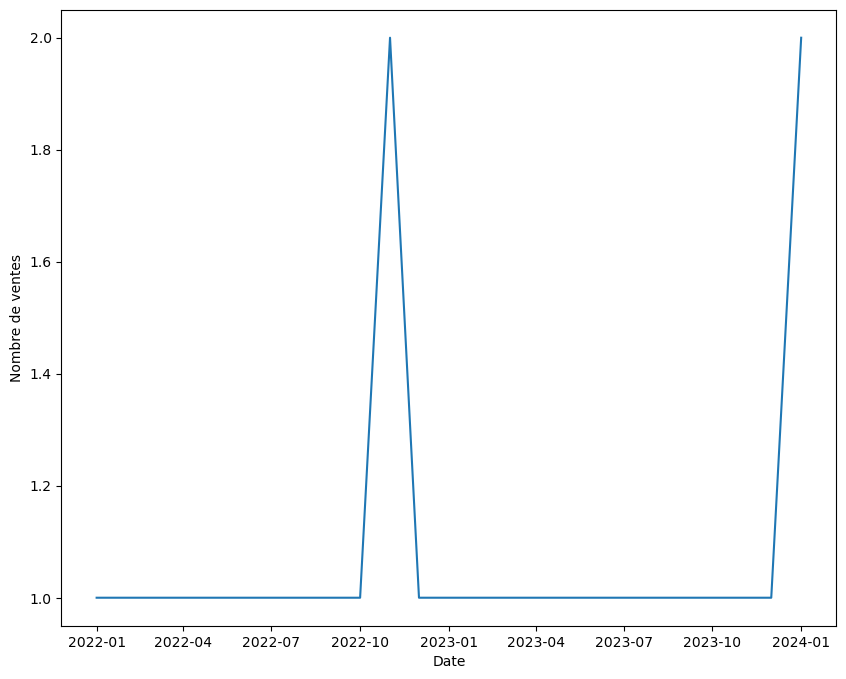

In [67]:
### Graphique linéaire
plt.figure(figsize=(10,8))
plt.plot(Saucisson_aux_noisettes_df["Date"], Saucisson_aux_noisettes_df["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

In [68]:
from statsmodels.tsa.stattools import adfuller  # Importation de la fonction adfuller
# Fonction pour effectuer le test ADF et différencier la série jusqu'à ce qu'elle soit stationnaire
def test_stationarity(series, diff_count=0):
    vente_result = adfuller(series)
    print(f"\nRésultats du test ADF pour la série temporelle:")
    print(f"Statistique ADF : {vente_result[0]}")
    print(f'p-value : {vente_result[1]}')
    print(f'Nombre de lags utilisés : {vente_result[2]}')
    print(f'Nombre d\'observations utilisées : {vente_result[3]}')
    print(f'Valeurs critiques :')
    for key, value in vente_result[4].items():
        print(f'\t{key}: {value}')

    # Interprétation
    if vente_result[1] < 0.05:
        print(f"La série temporelle est stationnaire après {diff_count} différenciations.")
        return series
    else:
        print("La série temporelle n'est pas stationnaire. Différenciation en cours...")
        # Différenciation
        diff_series = series.diff().dropna()
        return test_stationarity(diff_series, diff_count + 1)
    
    
print("Avant différentiation")
print(Saucisson_aux_noisettes_df['Nombre de ventes'])

# Test sur le nombre de ventes
ventes_stationnaires = test_stationarity(Saucisson_aux_noisettes_df['Nombre de ventes'])

print("Après différentiation")
print(ventes_stationnaires)

Avant différentiation
0     1
1     1
2     1
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    1
12    2
Name: Nombre de ventes, dtype: int64

Résultats du test ADF pour la série temporelle:
Statistique ADF : -2.7971546389275788
p-value : 0.05868135852489527
Nombre de lags utilisés : 0
Nombre d'observations utilisées : 12
Valeurs critiques :
	1%: -4.137829282407408
	5%: -3.1549724074074077
	10%: -2.7144769444444443
La série temporelle n'est pas stationnaire. Différenciation en cours...

Résultats du test ADF pour la série temporelle:
Statistique ADF : -4.100161064484782
p-value : 0.0009679309516910659
Nombre de lags utilisés : 0
Nombre d'observations utilisées : 11
Valeurs critiques :
	1%: -4.223238279489106
	5%: -3.189368925619835
	10%: -2.729839421487603
La série temporelle est stationnaire après 1 différenciations.
Après différentiation
1     0.0
2     0.0
3     0.0
4     0.0
5     1.0
6    -1.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    1.0
Name: N

In [69]:
# Convertir la série en DataFrame
ventes_stationnaires_df = ventes_stationnaires.to_frame()

# Ajouter la colonne "Date" du DataFrame coppa_df
ventes_stationnaires_df['Date'] = Saucisson_aux_noisettes_df['Date']

# Afficher le DataFrame
ventes_stationnaires_df

,Nombre de ventes,Date
1,0.0,2022-02-01
2,0.0,2022-08-01
3,0.0,2022-09-01
4,0.0,2022-10-01
5,1.0,2022-11-01
6,-1.0,2022-12-01
7,0.0,2023-02-01
8,0.0,2023-05-01
9,0.0,2023-10-01
10,0.0,2023-11-01


In [70]:
# surchetillonnage des donnees

# Définir la colonne 'Date' comme index
ventes_stationnaires_df.set_index('Date', inplace=True)

# Rééchantillonnage avec une fréquence plus élevée
df_resampled = ventes_stationnaires_df.resample('D').interpolate(method='linear')

# Réinitialiser l'index
df_resampled = df_resampled.reset_index()

# Afficher le DataFrame avec le sur-échantillonnage
df_resampled

,Date,Nombre de ventes
0,2022-02-01,0.000000
1,2022-02-02,0.000000
2,2022-02-03,0.000000
3,2022-02-04,0.000000
4,2022-02-05,0.000000
...,...,...
695,2023-12-28,0.870968
696,2023-12-29,0.903226
697,2023-12-30,0.935484
698,2023-12-31,0.967742


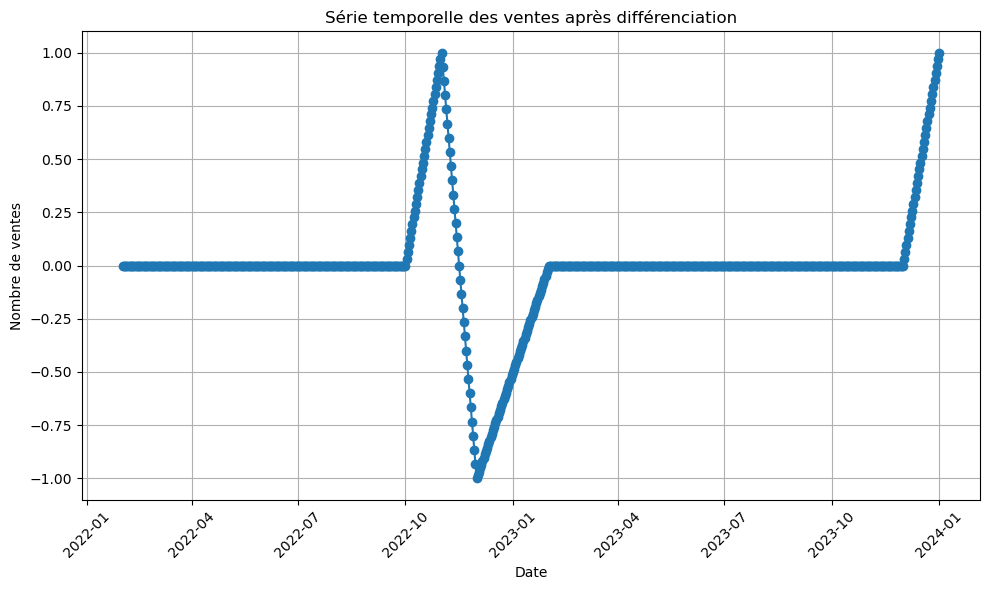

In [71]:
import matplotlib.pyplot as plt

# Tracer la série temporelle
plt.figure(figsize=(10, 6))
plt.plot(df_resampled['Date'], df_resampled['Nombre de ventes'], marker='o', linestyle='-')
plt.title('Série temporelle des ventes après différenciation')
plt.xlabel('Date')
plt.ylabel('Nombre de ventes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
# import itertools
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# import warnings
# warnings.filterwarnings('ignore')

# # Assurez-vous que coppa_df est défini

# # Paramètre d
# d = 0

# # Créer une liste des combinaisons possibles de p et q
# p = q = range(0, 7)
# pdq = list(itertools.product(p, q))

# # Initialiser les listes pour stocker les résultats
# results = []
# aic_values = []

# # Boucle sur toutes les combinaisons de p et q
# for param in pdq:
#     try:
#         model = ARIMA(df_resampled['Nombre de ventes'], order=(param[0], d, param[1]))
#         fitted_model = model.fit()
#         results.append(fitted_model)
#         aic_values.append(fitted_model.aic)
#     except:
#         continue

# # Trouver les ordres p et q qui minimisent l'AIC
# best_index = np.argmin(aic_values)
# best_model = results[best_index]
# best_pq = pdq[best_index]

# # Afficher les paramètres de la meilleure combinaison et la valeur de l'AIC minimale
# print(f"Meilleure combinaison d'ordres p, d et q: {best_pq[0]},{d},{best_pq[1]}")
# print(f"Valeur de l'AIC minimale: {best_model.aic}")

In [73]:
# Séparer les données d'entraînement et de test
train_data = df_resampled[df_resampled['Date'].dt.year != 2023]
test_data = df_resampled[df_resampled['Date'].dt.year >= 2023]

In [74]:
from statsmodels.tsa.arima.model import ARIMA

# Définir l'ordre du modèle ARIMA
order = (2,0,0)

# Entraîner le modèle ARIMA sur la série stationnaire
model = ARIMA(train_data['Nombre de ventes'], order=order)
model_fit_Saucisson_aux_noisettes = model.fit()

# Stocker le modèle dans un dictionnaire avec la clé "coppa"
trained_models = {
    "coppa": model_fit_coppa,
    "Saucisson à la pistache": model_fit_Saucisson_à_la_pistache,
    "Sérum hydratant Vichy": model_fit_Sérum_hydratant_Vichy,
#     "Rillettes d'oie": model_fit_Rillettes_doie,
#     "Saucisson aux noisettes": model_fit_Saucisson_aux_noisettes,

}

# Résumé du modèle
print(model_fit_Saucisson_aux_noisettes.summary())

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       Nombre de ventes   No. Observations:                  335
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 359.655
Date:                Wed, 27 Mar 2024   AIC                           -711.310
Time:                        11:21:04   BIC                           -696.053
Sample:                             0   HQIC                          -705.228
                                - 335                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1355      1.304      0.104      0.917      -2.420       2.691
ar.L1          1.8368      0.217      8.457      0.000       1.411       2.262
ar.L2         -0.8636      0.237     -3.640      0.0

In [75]:
# # Prédictions sur les données d'entraînement
# train_predictions = model_fit_Saucisson_aux_noisettes.predict(start=train_data.index.min(), end=train_data.index.max(), typ='levels')

# # Prédictions sur les données de test
# test_predictions = model_fit_Saucisson_aux_noisettes.forecast(steps=len(test_data))

# # Plot
# plt.figure(figsize=(10, 6))

# # Données d'entraînement
# plt.plot(train_data['Date'], train_data['Nombre de ventes'], label='Données d\'entraînement', color='blue')

# # Prédictions sur les données d'entraînement
# plt.plot(train_data['Date'], train_predictions, label='Prédictions (entraînement)', color='green')

# # Données de test
# plt.plot(test_data['Date'], test_data['Nombre de ventes'], label='Données de test', color='black')

# # Prédictions sur les données de test
# plt.plot(test_data['Date'], test_predictions, label='Prédictions (test)', color='red')

# plt.title('Comparaison entre les données réelles et les prédictions (ARIMA)')
# plt.xlabel('Date')
# plt.ylabel('Nombre de ventes')
# plt.legend()
# plt.show()

In [76]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculer RMSE pour les données d'entraînement
train_predictions = model_fit_Saucisson_aux_noisettes.predict(start=0, end=len(train_data)-1)
train_rmse = np.sqrt(mean_squared_error(train_data['Nombre de ventes'], train_predictions))

# Calculer RMSE pour les données de test
test_predictions = model_fit_Saucisson_aux_noisettes.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
test_rmse = np.sqrt(mean_squared_error(test_data['Nombre de ventes'], test_predictions))

print("RMSE pour les données d'entraînement:", train_rmse)
print("RMSE pour les données de test:", test_rmse)


RMSE pour les données d'entraînement: 0.08225808832255324
RMSE pour les données de test: 0.9887714093352845


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Saucisson de Lyon

In [77]:
# Accéder au DataFrame spécifique pour le produit 'Coppa'
Saucisson_de_Lyon_df = sous_dataframes['Saucisson de Lyon']
Saucisson_de_Lyon_df.reset_index(drop=True, inplace=True)
Saucisson_de_Lyon_df

,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Saucisson de Lyon,1,1400.0,1400.0,2021-06-01
1,Saucisson de Lyon,2,2800.0,1400.0,2022-01-01
2,Saucisson de Lyon,1,1400.0,1400.0,2022-03-01
3,Saucisson de Lyon,1,1400.0,1400.0,2022-05-01
4,Saucisson de Lyon,3,4200.0,1400.0,2022-06-01
5,Saucisson de Lyon,1,1400.0,1400.0,2022-09-01
6,Saucisson de Lyon,1,1400.0,1400.0,2022-12-01
7,Saucisson de Lyon,1,1400.0,1400.0,2023-02-01
8,Saucisson de Lyon,1,1400.0,1400.0,2023-05-01
9,Saucisson de Lyon,1,1400.0,1400.0,2023-11-01


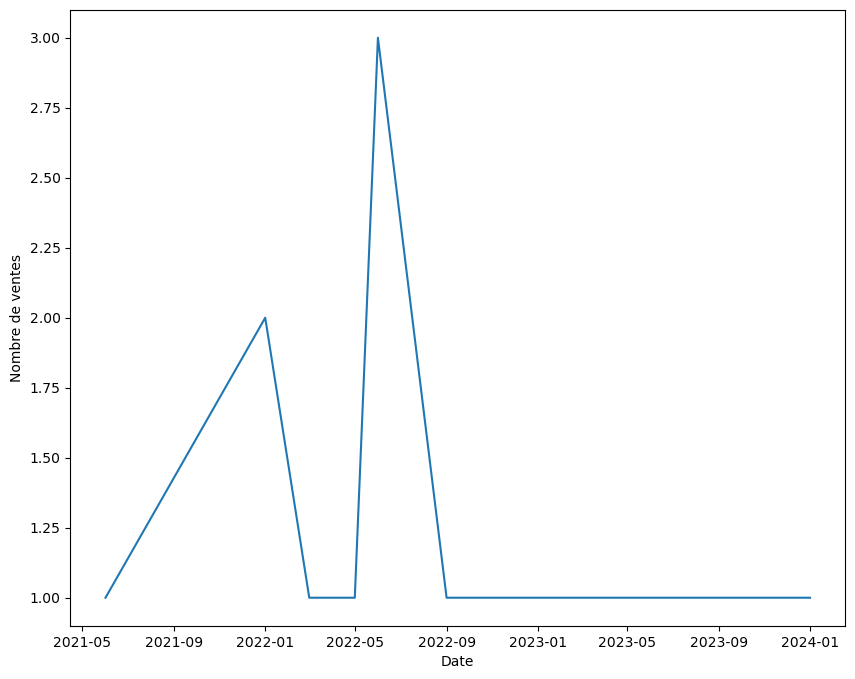

In [78]:
### Graphique linéaire
plt.figure(figsize=(10,8))
plt.plot(Saucisson_de_Lyon_df["Date"], Saucisson_de_Lyon_df["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

In [79]:
from statsmodels.tsa.stattools import adfuller  # Importation de la fonction adfuller
# Fonction pour effectuer le test ADF et différencier la série jusqu'à ce qu'elle soit stationnaire
def test_stationarity(series, diff_count=0):
    vente_result = adfuller(series)
    print(f"\nRésultats du test ADF pour la série temporelle:")
    print(f"Statistique ADF : {vente_result[0]}")
    print(f'p-value : {vente_result[1]}')
    print(f'Nombre de lags utilisés : {vente_result[2]}')
    print(f'Nombre d\'observations utilisées : {vente_result[3]}')
    print(f'Valeurs critiques :')
    for key, value in vente_result[4].items():
        print(f'\t{key}: {value}')

    # Interprétation
    if vente_result[1] < 0.05:
        print(f"La série temporelle est stationnaire après {diff_count} différenciations.")
        return series
    else:
        print("La série temporelle n'est pas stationnaire. Différenciation en cours...")
        # Différenciation
        diff_series = series.diff().dropna()
        return test_stationarity(diff_series, diff_count + 1)
    
    
print("Avant différentiation")
print(Saucisson_de_Lyon_df['Nombre de ventes'])

# Test sur le nombre de ventes
ventes_stationnaires = test_stationarity(Saucisson_de_Lyon_df['Nombre de ventes'])

print("Après différentiation")
print(ventes_stationnaires)

Avant différentiation
0     1
1     2
2     1
3     1
4     3
5     1
6     1
7     1
8     1
9     1
10    1
11    1
Name: Nombre de ventes, dtype: int64

Résultats du test ADF pour la série temporelle:
Statistique ADF : -3.6576465628021486
p-value : 0.004749908356450518
Nombre de lags utilisés : 0
Nombre d'observations utilisées : 11
Valeurs critiques :
	1%: -4.223238279489106
	5%: -3.189368925619835
	10%: -2.729839421487603
La série temporelle est stationnaire après 0 différenciations.
Après différentiation
0     1
1     2
2     1
3     1
4     3
5     1
6     1
7     1
8     1
9     1
10    1
11    1
Name: Nombre de ventes, dtype: int64


In [80]:
# Convertir la série en DataFrame
ventes_stationnaires_df = ventes_stationnaires.to_frame()

# Ajouter la colonne "Date" du DataFrame coppa_df
ventes_stationnaires_df['Date'] = Saucisson_de_Lyon_df['Date']

# Afficher le DataFrame
ventes_stationnaires_df

,Nombre de ventes,Date
0,1,2021-06-01
1,2,2022-01-01
2,1,2022-03-01
3,1,2022-05-01
4,3,2022-06-01
5,1,2022-09-01
6,1,2022-12-01
7,1,2023-02-01
8,1,2023-05-01
9,1,2023-11-01


In [81]:
# surchetillonnage des donnees

# Définir la colonne 'Date' comme index
ventes_stationnaires_df.set_index('Date', inplace=True)

# Rééchantillonnage avec une fréquence plus élevée
df_resampled = ventes_stationnaires_df.resample('D').interpolate(method='linear')

# Réinitialiser l'index
df_resampled = df_resampled.reset_index()

# Afficher le DataFrame avec le sur-échantillonnage
df_resampled

,Date,Nombre de ventes
0,2021-06-01,1.000000
1,2021-06-02,1.004673
2,2021-06-03,1.009346
3,2021-06-04,1.014019
4,2021-06-05,1.018692
...,...,...
940,2023-12-28,1.000000
941,2023-12-29,1.000000
942,2023-12-30,1.000000
943,2023-12-31,1.000000


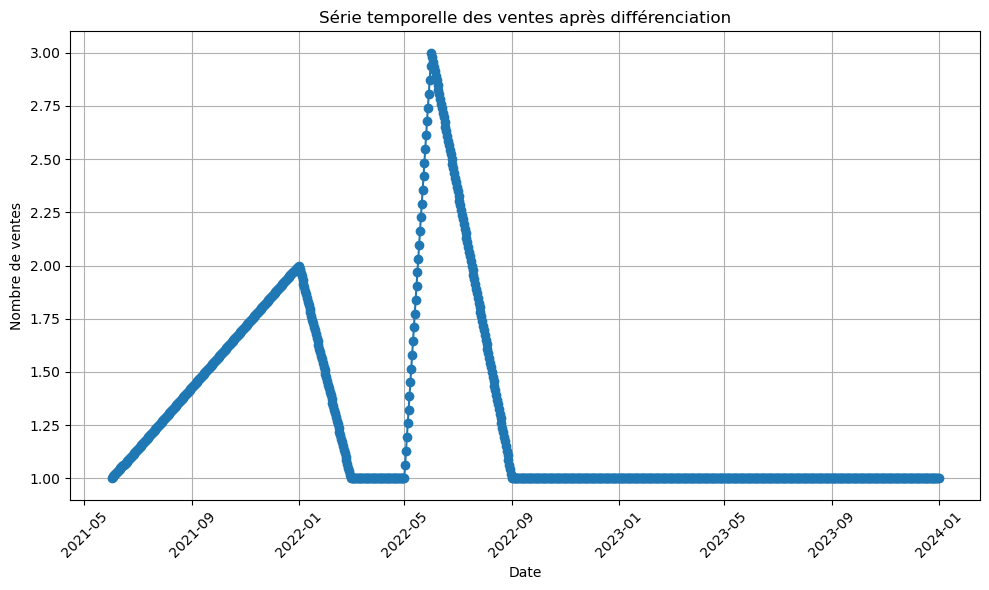

In [82]:
import matplotlib.pyplot as plt

# Tracer la série temporelle
plt.figure(figsize=(10, 6))
plt.plot(df_resampled['Date'], df_resampled['Nombre de ventes'], marker='o', linestyle='-')
plt.title('Série temporelle des ventes après différenciation')
plt.xlabel('Date')
plt.ylabel('Nombre de ventes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
# import itertools
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# import warnings
# warnings.filterwarnings('ignore')

# # Assurez-vous que coppa_df est défini

# # Paramètre d
# d = 0

# # Créer une liste des combinaisons possibles de p et q
# p = q = range(0, 7)
# pdq = list(itertools.product(p, q))

# # Initialiser les listes pour stocker les résultats
# results = []
# aic_values = []

# # Boucle sur toutes les combinaisons de p et q
# for param in pdq:
#     try:
#         model = ARIMA(df_resampled['Nombre de ventes'], order=(param[0], d, param[1]))
#         fitted_model = model.fit()
#         results.append(fitted_model)
#         aic_values.append(fitted_model.aic)
#     except:
#         continue

# # Trouver les ordres p et q qui minimisent l'AIC
# best_index = np.argmin(aic_values)
# best_model = results[best_index]
# best_pq = pdq[best_index]

# # Afficher les paramètres de la meilleure combinaison et la valeur de l'AIC minimale
# print(f"Meilleure combinaison d'ordres p, d et q: {best_pq[0]},{d},{best_pq[1]}")
# print(f"Valeur de l'AIC minimale: {best_model.aic}")

In [84]:
# Séparer les données d'entraînement et de test
train_data = df_resampled[df_resampled['Date'].dt.year != 2023]
test_data = df_resampled[df_resampled['Date'].dt.year >= 2023]

In [85]:
from statsmodels.tsa.arima.model import ARIMA

# Définir l'ordre du modèle ARIMA
order = (2,0,0)

# Entraîner le modèle ARIMA sur la série stationnaire
model = ARIMA(train_data['Nombre de ventes'], order=order)
model_fit_Saucisson_de_Lyon = model.fit()

# Stocker le modèle dans un dictionnaire avec la clé "coppa"
trained_models = {
    "coppa": model_fit_coppa,
    "Saucisson à la pistache": model_fit_Saucisson_à_la_pistache,
    "Sérum hydratant Vichy": model_fit_Sérum_hydratant_Vichy,
#     "Rillettes d'oie": model_fit_Rillettes_doie,
#     "Saucisson aux noisettes": model_fit_Saucisson_aux_noisettes,
    "Saucisson de Lyon": model_fit_Saucisson_de_Lyon,

}
# Résumé du modèle
print(model_fit_Saucisson_de_Lyon.summary())

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       Nombre de ventes   No. Observations:                  580
Model:                 ARIMA(2, 0, 0)   Log Likelihood                2289.873
Date:                Wed, 27 Mar 2024   AIC                          -4571.746
Time:                        11:21:05   BIC                          -4554.294
Sample:                             0   HQIC                         -4564.942
                                - 580                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4474      0.294      4.929      0.000       0.872       2.023
ar.L1          1.9662      0.021     94.375      0.000       1.925       2.007
ar.L2         -0.9676      0.022    -43.933      0.0

In [86]:
# # Prédictions sur les données d'entraînement
# train_predictions = model_fit_Saucisson_de_Lyon.predict(start=train_data.index.min(), end=train_data.index.max(), typ='levels')

# # Prédictions sur les données de test
# test_predictions = model_fit_Saucisson_de_Lyon.forecast(steps=len(test_data))

# # Plot
# plt.figure(figsize=(10, 6))

# # Données d'entraînement
# plt.plot(train_data['Date'], train_data['Nombre de ventes'], label='Données d\'entraînement', color='blue')

# # Prédictions sur les données d'entraînement
# plt.plot(train_data['Date'], train_predictions, label='Prédictions (entraînement)', color='green')

# # Données de test
# plt.plot(test_data['Date'], test_data['Nombre de ventes'], label='Données de test', color='black')

# # Prédictions sur les données de test
# plt.plot(test_data['Date'], test_predictions, label='Prédictions (test)', color='red')

# plt.title('Comparaison entre les données réelles et les prédictions (ARIMA)')
# plt.xlabel('Date')
# plt.ylabel('Nombre de ventes')
# plt.legend()
# plt.show()

In [87]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculer RMSE pour les données d'entraînement
train_predictions = model_fit_Saucisson_de_Lyon.predict(start=0, end=len(train_data)-1)
train_rmse = np.sqrt(mean_squared_error(train_data['Nombre de ventes'], train_predictions))

# Calculer RMSE pour les données de test
test_predictions = model_fit_Saucisson_de_Lyon.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
test_rmse = np.sqrt(mean_squared_error(test_data['Nombre de ventes'], test_predictions))

print("RMSE pour les données d'entraînement:", train_rmse)
print("RMSE pour les données de test:", test_rmse)

RMSE pour les données d'entraînement: 0.01914363174503458
RMSE pour les données de test: 0.4354266386730688


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Crème raffermissante pour le corps Garnier

In [88]:
# Accéder au DataFrame spécifique pour le produit 'Coppa'
Crème_raffermissante_pour_le_corps_Garnier_df = sous_dataframes['Crème raffermissante pour le corps Garnier']
Crème_raffermissante_pour_le_corps_Garnier_df.reset_index(drop=True, inplace=True)
Crème_raffermissante_pour_le_corps_Garnier_df

,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2021-06-01
1,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2022-05-01
2,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2022-07-01
3,Crème raffermissante pour le corps Garnier,4,8000.0,2000.0,2022-11-01
4,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2022-12-01
5,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2023-02-01
6,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2023-04-01
7,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2023-05-01
8,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2023-07-01
9,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2023-08-01


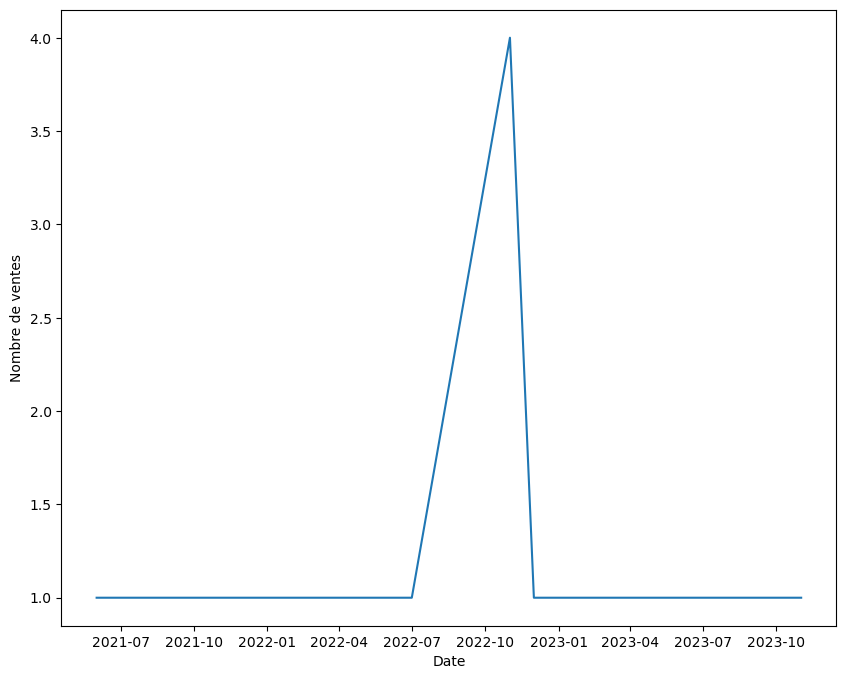

In [89]:
### Graphique linéaire
plt.figure(figsize=(10,8))
plt.plot(Crème_raffermissante_pour_le_corps_Garnier_df["Date"], Crème_raffermissante_pour_le_corps_Garnier_df["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

In [90]:
from statsmodels.tsa.stattools import adfuller  # Importation de la fonction adfuller
# Fonction pour effectuer le test ADF et différencier la série jusqu'à ce qu'elle soit stationnaire
def test_stationarity(series, diff_count=0):
    vente_result = adfuller(series)
    print(f"\nRésultats du test ADF pour la série temporelle:")
    print(f"Statistique ADF : {vente_result[0]}")
    print(f'p-value : {vente_result[1]}')
    print(f'Nombre de lags utilisés : {vente_result[2]}')
    print(f'Nombre d\'observations utilisées : {vente_result[3]}')
    print(f'Valeurs critiques :')
    for key, value in vente_result[4].items():
        print(f'\t{key}: {value}')

    # Interprétation
    if vente_result[1] < 0.05:
        print(f"La série temporelle est stationnaire après {diff_count} différenciations.")
        return series
    else:
        print("La série temporelle n'est pas stationnaire. Différenciation en cours...")
        # Différenciation
        diff_series = series.diff().dropna()
        return test_stationarity(diff_series, diff_count + 1)
    
    
print("Avant différentiation")
print(Crème_raffermissante_pour_le_corps_Garnier_df['Nombre de ventes'])

# Test sur le nombre de ventes
ventes_stationnaires = test_stationarity(Crème_raffermissante_pour_le_corps_Garnier_df['Nombre de ventes'])

print("Après différentiation")
print(ventes_stationnaires)

Avant différentiation
0     1
1     1
2     1
3     4
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Nombre de ventes, dtype: int64

Résultats du test ADF pour la série temporelle:
Statistique ADF : -3.1622776601683795
p-value : 0.022274688658288883
Nombre de lags utilisés : 0
Nombre d'observations utilisées : 10
Valeurs critiques :
	1%: -4.331573
	5%: -3.23295
	10%: -2.7487
La série temporelle est stationnaire après 0 différenciations.
Après différentiation
0     1
1     1
2     1
3     4
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Nombre de ventes, dtype: int64


In [91]:
# Convertir la série en DataFrame
ventes_stationnaires_df = ventes_stationnaires.to_frame()

# Ajouter la colonne "Date" du DataFrame coppa_df
ventes_stationnaires_df['Date'] = Crème_raffermissante_pour_le_corps_Garnier_df['Date']

# Afficher le DataFrame
ventes_stationnaires_df

,Nombre de ventes,Date
0,1,2021-06-01
1,1,2022-05-01
2,1,2022-07-01
3,4,2022-11-01
4,1,2022-12-01
5,1,2023-02-01
6,1,2023-04-01
7,1,2023-05-01
8,1,2023-07-01
9,1,2023-08-01


In [92]:
# surchetillonnage des donnees

# Définir la colonne 'Date' comme index
ventes_stationnaires_df.set_index('Date', inplace=True)

# Rééchantillonnage avec une fréquence plus élevée
df_resampled = ventes_stationnaires_df.resample('D').interpolate(method='linear')

# Réinitialiser l'index
df_resampled = df_resampled.reset_index()

# Afficher le DataFrame avec le sur-échantillonnage
df_resampled

,Date,Nombre de ventes
0,2021-06-01,1.0
1,2021-06-02,1.0
2,2021-06-03,1.0
3,2021-06-04,1.0
4,2021-06-05,1.0
...,...,...
879,2023-10-28,1.0
880,2023-10-29,1.0
881,2023-10-30,1.0
882,2023-10-31,1.0


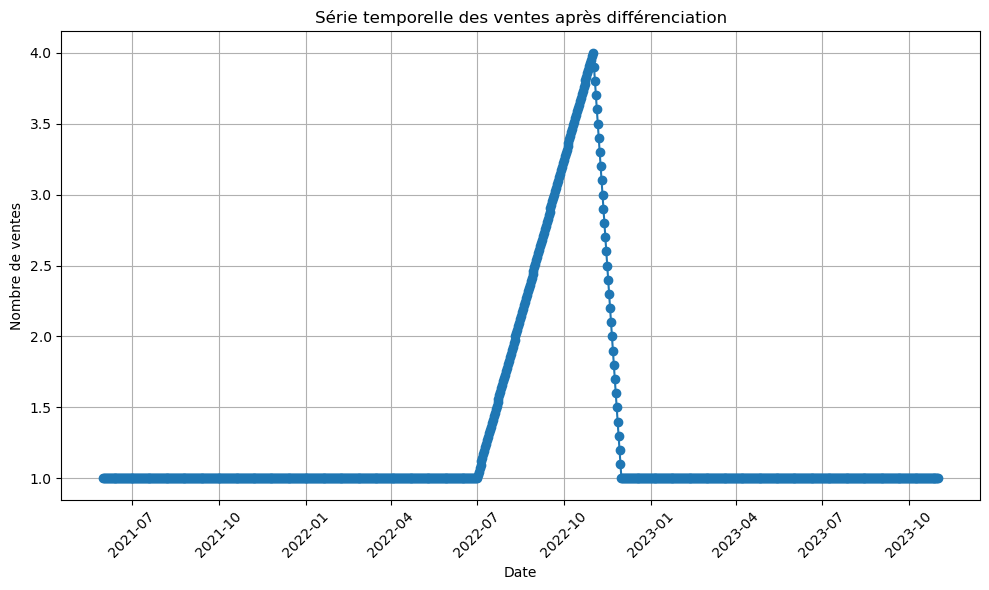

In [93]:
import matplotlib.pyplot as plt

# Tracer la série temporelle
plt.figure(figsize=(10, 6))
plt.plot(df_resampled['Date'], df_resampled['Nombre de ventes'], marker='o', linestyle='-')
plt.title('Série temporelle des ventes après différenciation')
plt.xlabel('Date')
plt.ylabel('Nombre de ventes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [94]:
# import itertools
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# import warnings
# warnings.filterwarnings('ignore')

# # Assurez-vous que coppa_df est défini

# # Paramètre d
# d = 0

# # Créer une liste des combinaisons possibles de p et q
# p = q = range(0, 7)
# pdq = list(itertools.product(p, q))

# # Initialiser les listes pour stocker les résultats
# results = []
# aic_values = []

# # Boucle sur toutes les combinaisons de p et q
# for param in pdq:
#     try:
#         model = ARIMA(df_resampled['Nombre de ventes'], order=(param[0], d, param[1]))
#         fitted_model = model.fit()
#         results.append(fitted_model)
#         aic_values.append(fitted_model.aic)
#     except:
#         continue

# # Trouver les ordres p et q qui minimisent l'AIC
# best_index = np.argmin(aic_values)
# best_model = results[best_index]
# best_pq = pdq[best_index]

# # Afficher les paramètres de la meilleure combinaison et la valeur de l'AIC minimale
# print(f"Meilleure combinaison d'ordres p, d et q: {best_pq[0]},{d},{best_pq[1]}")
# print(f"Valeur de l'AIC minimale: {best_model.aic}")

In [95]:
# Séparer les données d'entraînement et de test
train_data = df_resampled[df_resampled['Date'].dt.year != 2023]
test_data = df_resampled[df_resampled['Date'].dt.year >= 2023]

In [96]:
from statsmodels.tsa.arima.model import ARIMA

# Définir l'ordre du modèle ARIMA
order = (2,0,0)

# Entraîner le modèle ARIMA sur la série stationnaire
model = ARIMA(train_data['Nombre de ventes'], order=order)
model_fit_Crème_raffermissante_pour_le_corps_Garnier = model.fit()

# Stocker le modèle dans un dictionnaire avec la clé "coppa"
trained_models = {
    "coppa": model_fit_coppa,
    "Saucisson à la pistache": model_fit_Saucisson_à_la_pistache,
    "Sérum hydratant Vichy": model_fit_Sérum_hydratant_Vichy,
#     "Rillettes d'oie": model_fit_Rillettes_doie,
#     "Saucisson aux noisettes": model_fit_Saucisson_aux_noisettes,
    "Saucisson de Lyon": model_fit_Saucisson_de_Lyon,
    "Crème raffermissante pour le corps Garnier": model_fit_Crème_raffermissante_pour_le_corps_Garnier,

}

# Résumé du modèle
print(model_fit_Crème_raffermissante_pour_le_corps_Garnier.summary())

                               SARIMAX Results                                
Dep. Variable:       Nombre de ventes   No. Observations:                  579
Model:                 ARIMA(2, 0, 0)   Log Likelihood                2078.853
Date:                Wed, 27 Mar 2024   AIC                          -4149.706
Time:                        11:21:06   BIC                          -4132.261
Sample:                             0   HQIC                         -4142.904
                                - 579                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3964      1.211      1.153      0.249      -0.977       3.770
ar.L1          1.9646      0.016    121.662      0.000       1.933       1.996
ar.L2         -0.9656      0.016    -60.941      0.0

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


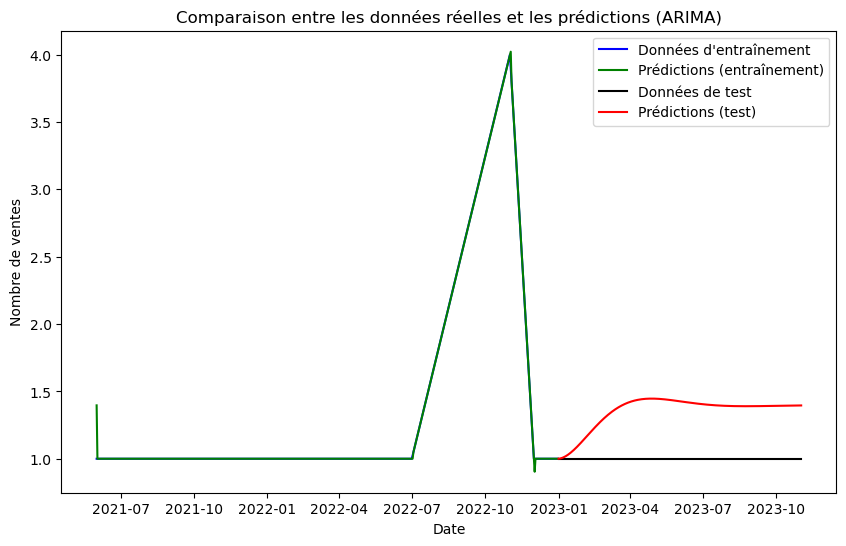

In [97]:
# Prédictions sur les données d'entraînement
train_predictions = model_fit_Crème_raffermissante_pour_le_corps_Garnier.predict(start=train_data.index.min(), end=train_data.index.max(), typ='levels')

# Prédictions sur les données de test
test_predictions = model_fit_Crème_raffermissante_pour_le_corps_Garnier.forecast(steps=len(test_data))

# Plot
plt.figure(figsize=(10, 6))

# Données d'entraînement
plt.plot(train_data['Date'], train_data['Nombre de ventes'], label='Données d\'entraînement', color='blue')

# Prédictions sur les données d'entraînement
plt.plot(train_data['Date'], train_predictions, label='Prédictions (entraînement)', color='green')

# Données de test
plt.plot(test_data['Date'], test_data['Nombre de ventes'], label='Données de test', color='black')

# Prédictions sur les données de test
plt.plot(test_data['Date'], test_predictions, label='Prédictions (test)', color='red')

plt.title('Comparaison entre les données réelles et les prédictions (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Nombre de ventes')
plt.legend()
plt.show()

In [98]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculer RMSE pour les données d'entraînement
train_predictions = model_fit_Crème_raffermissante_pour_le_corps_Garnier.predict(start=0, end=len(train_data)-1)
train_rmse = np.sqrt(mean_squared_error(train_data['Nombre de ventes'], train_predictions))

# Calculer RMSE pour les données de test
test_predictions = model_fit_Crème_raffermissante_pour_le_corps_Garnier.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
test_rmse = np.sqrt(mean_squared_error(test_data['Nombre de ventes'], test_predictions))

print("RMSE pour les données d'entraînement:", train_rmse)
print("RMSE pour les données de test:", test_rmse)


RMSE pour les données d'entraînement: 0.017746953631781356
RMSE pour les données de test: 0.3717347110663668


# Jambon de Luxeuil	

In [1]:
# Accéder au DataFrame spécifique pour le produit 'Coppa'
Jambon_de_Luxeuil_df = sous_dataframes['Jambon de Luxeuil']
Jambon_de_Luxeuil_df.reset_index(drop=True, inplace=True)
Jambon_de_Luxeuil_df

NameError: name 'sous_dataframes' is not defined

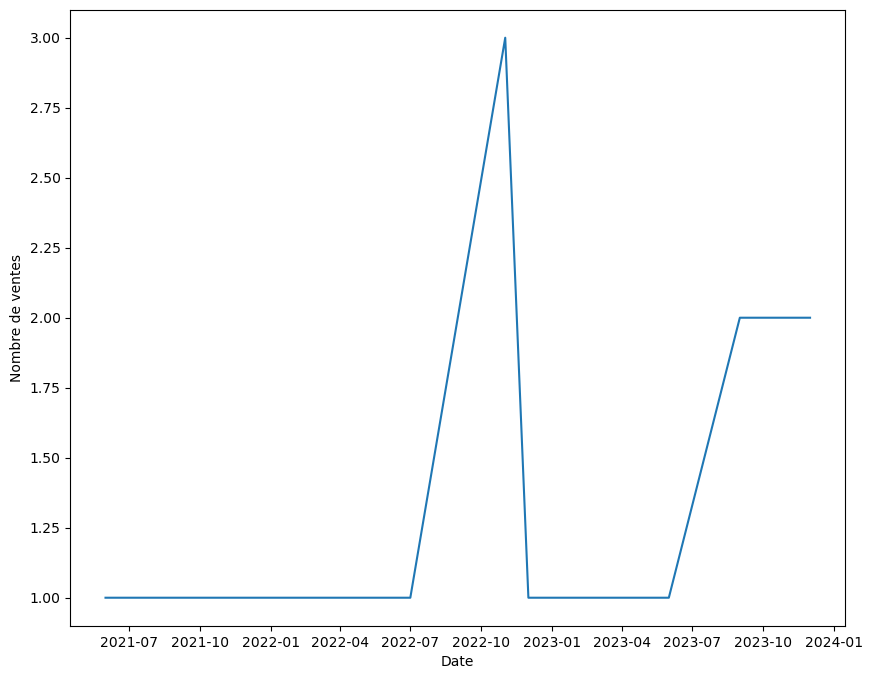

In [100]:
### Graphique linéaire
plt.figure(figsize=(10,8))
plt.plot(Jambon_de_Luxeuil_df["Date"], Jambon_de_Luxeuil_df["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

In [101]:
from statsmodels.tsa.stattools import adfuller  # Importation de la fonction adfuller
# Fonction pour effectuer le test ADF et différencier la série jusqu'à ce qu'elle soit stationnaire
def test_stationarity(series, diff_count=0):
    vente_result = adfuller(series)
    print(f"\nRésultats du test ADF pour la série temporelle:")
    print(f"Statistique ADF : {vente_result[0]}")
    print(f'p-value : {vente_result[1]}')
    print(f'Nombre de lags utilisés : {vente_result[2]}')
    print(f'Nombre d\'observations utilisées : {vente_result[3]}')
    print(f'Valeurs critiques :')
    for key, value in vente_result[4].items():
        print(f'\t{key}: {value}')

    # Interprétation
    if vente_result[1] < 0.05:
        print(f"La série temporelle est stationnaire après {diff_count} différenciations.")
        return series
    else:
        print("La série temporelle n'est pas stationnaire. Différenciation en cours...")
        # Différenciation
        diff_series = series.diff().dropna()
        return test_stationarity(diff_series, diff_count + 1)
    
    
print("Avant différentiation")
print(Jambon_de_Luxeuil_df['Nombre de ventes'])

# Test sur le nombre de ventes
ventes_stationnaires = test_stationarity(Jambon_de_Luxeuil_df['Nombre de ventes'])

print("Après différentiation")
print(ventes_stationnaires)

Avant différentiation
0    1
1    1
2    1
3    1
4    3
5    1
6    1
7    1
8    2
9    2
Name: Nombre de ventes, dtype: int64

Résultats du test ADF pour la série temporelle:
Statistique ADF : -92619895808091.8
p-value : 0.0
Nombre de lags utilisés : 3
Nombre d'observations utilisées : 6
Valeurs critiques :
	1%: -5.354256481481482
	5%: -3.6462381481481483
	10%: -2.901197777777778
La série temporelle est stationnaire après 0 différenciations.
Après différentiation
0    1
1    1
2    1
3    1
4    3
5    1
6    1
7    1
8    2
9    2
Name: Nombre de ventes, dtype: int64


In [102]:
# Convertir la série en DataFrame
ventes_stationnaires_df = ventes_stationnaires.to_frame()

# Ajouter la colonne "Date" du DataFrame coppa_df
ventes_stationnaires_df['Date'] = Jambon_de_Luxeuil_df['Date']

# Afficher le DataFrame
ventes_stationnaires_df

,Nombre de ventes,Date
0,1,2021-06-01
1,1,2022-04-01
2,1,2022-05-01
3,1,2022-07-01
4,3,2022-11-01
5,1,2022-12-01
6,1,2023-02-01
7,1,2023-06-01
8,2,2023-09-01
9,2,2023-12-01


In [103]:
# surchetillonnage des donnees

# Définir la colonne 'Date' comme index
ventes_stationnaires_df.set_index('Date', inplace=True)

# Rééchantillonnage avec une fréquence plus élevée
df_resampled = ventes_stationnaires_df.resample('D').interpolate(method='linear')

# Réinitialiser l'index
df_resampled = df_resampled.reset_index()

# Afficher le DataFrame avec le sur-échantillonnage
df_resampled

,Date,Nombre de ventes
0,2021-06-01,1.0
1,2021-06-02,1.0
2,2021-06-03,1.0
3,2021-06-04,1.0
4,2021-06-05,1.0
...,...,...
909,2023-11-27,2.0
910,2023-11-28,2.0
911,2023-11-29,2.0
912,2023-11-30,2.0


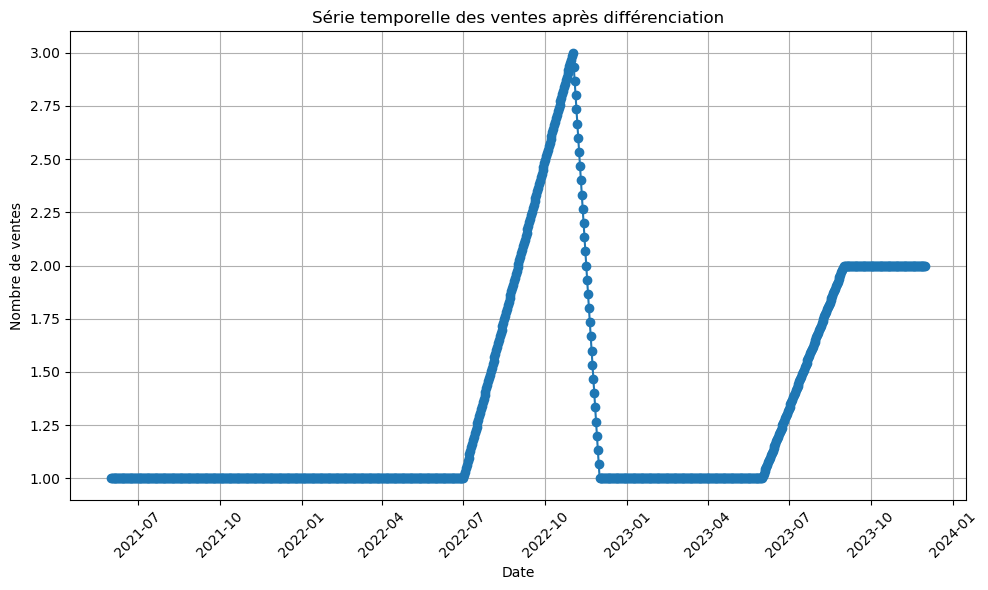

In [104]:
import matplotlib.pyplot as plt

# Tracer la série temporelle
plt.figure(figsize=(10, 6))
plt.plot(df_resampled['Date'], df_resampled['Nombre de ventes'], marker='o', linestyle='-')
plt.title('Série temporelle des ventes après différenciation')
plt.xlabel('Date')
plt.ylabel('Nombre de ventes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [105]:
# import itertools
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# import warnings
# warnings.filterwarnings('ignore')

# # Assurez-vous que coppa_df est défini

# # Paramètre d
# d = 0

# # Créer une liste des combinaisons possibles de p et q
# p = q = range(0, 7)
# pdq = list(itertools.product(p, q))

# # Initialiser les listes pour stocker les résultats
# results = []
# aic_values = []

# # Boucle sur toutes les combinaisons de p et q
# for param in pdq:
#     try:
#         model = ARIMA(df_resampled['Nombre de ventes'], order=(param[0], d, param[1]))
#         fitted_model = model.fit()
#         results.append(fitted_model)
#         aic_values.append(fitted_model.aic)
#     except:
#         continue

# # Trouver les ordres p et q qui minimisent l'AIC
# best_index = np.argmin(aic_values)
# best_model = results[best_index]
# best_pq = pdq[best_index]

# # Afficher les paramètres de la meilleure combinaison et la valeur de l'AIC minimale
# print(f"Meilleure combinaison d'ordres p, d et q: {best_pq[0]},{d},{best_pq[1]}")
# print(f"Valeur de l'AIC minimale: {best_model.aic}")

In [106]:
# Séparer les données d'entraînement et de test
train_data = df_resampled[df_resampled['Date'].dt.year != 2023]
test_data = df_resampled[df_resampled['Date'].dt.year >= 2023]

In [107]:
from statsmodels.tsa.arima.model import ARIMA

# Définir l'ordre du modèle ARIMA
order = (2,0,0)

# Entraîner le modèle ARIMA sur la série stationnaire
model = ARIMA(train_data['Nombre de ventes'], order=order)
model_fit_Jambon_de_Luxeuil = model.fit()

# Stocker le modèle dans un dictionnaire avec la clé "coppa"
trained_models = {
    "coppa": model_fit_coppa,
    "Saucisson à la pistache": model_fit_Saucisson_à_la_pistache,
    "Sérum hydratant Vichy": model_fit_Sérum_hydratant_Vichy,
#     "Rillettes d'oie": model_fit_Rillettes_doie,
#     "Saucisson aux noisettes": model_fit_Saucisson_aux_noisettes,
    "Saucisson de Lyon": model_fit_Saucisson_de_Lyon,
    "Crème raffermissante pour le corps Garnier": model_fit_Crème_raffermissante_pour_le_corps_Garnier,
    "Jambon de Luxeuil": model_fit_Jambon_de_Luxeuil,


}

# Résumé du modèle
print(model_fit_Jambon_de_Luxeuil.summary())

                               SARIMAX Results                                
Dep. Variable:       Nombre de ventes   No. Observations:                  579
Model:                 ARIMA(2, 0, 0)   Log Likelihood                2313.617
Date:                Wed, 27 Mar 2024   AIC                          -4619.234
Time:                        11:21:07   BIC                          -4601.789
Sample:                             0   HQIC                         -4612.432
                                - 579                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2642      0.807      1.567      0.117      -0.317       2.845
ar.L1          1.9646      0.016    121.711      0.000       1.933       1.996
ar.L2         -0.9656      0.016    -60.967      0.0

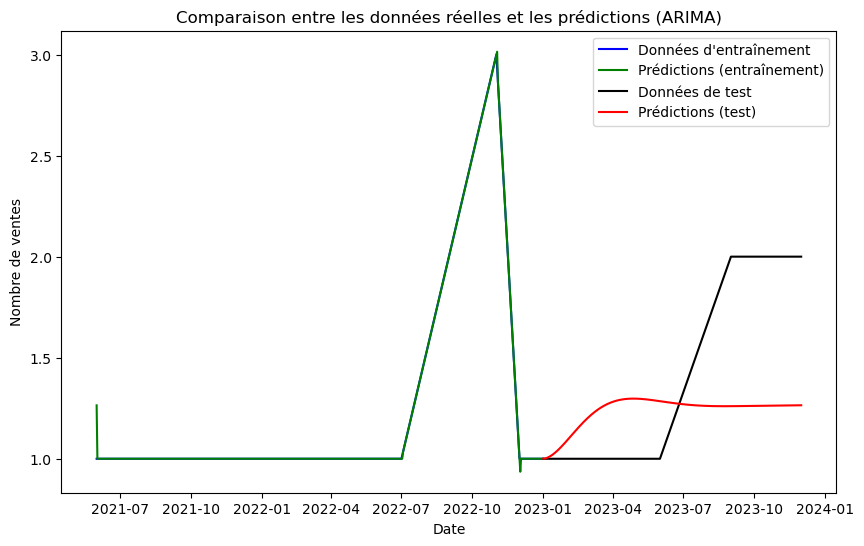

In [108]:
# Prédictions sur les données d'entraînement
train_predictions = model_fit_Jambon_de_Luxeuil.predict(start=train_data.index.min(), end=train_data.index.max(), typ='levels')

# Prédictions sur les données de test
test_predictions = model_fit_Jambon_de_Luxeuil.forecast(steps=len(test_data))

# Plot
plt.figure(figsize=(10, 6))

# Données d'entraînement
plt.plot(train_data['Date'], train_data['Nombre de ventes'], label='Données d\'entraînement', color='blue')

# Prédictions sur les données d'entraînement
plt.plot(train_data['Date'], train_predictions, label='Prédictions (entraînement)', color='green')

# Données de test
plt.plot(test_data['Date'], test_data['Nombre de ventes'], label='Données de test', color='black')

# Prédictions sur les données de test
plt.plot(test_data['Date'], test_predictions, label='Prédictions (test)', color='red')

plt.title('Comparaison entre les données réelles et les prédictions (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Nombre de ventes')
plt.legend()
plt.show()

In [109]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculer RMSE pour les données d'entraînement
train_predictions = model_fit_Jambon_de_Luxeuil.predict(start=0, end=len(train_data)-1)
train_rmse = np.sqrt(mean_squared_error(train_data['Nombre de ventes'], train_predictions))

# Calculer RMSE pour les données de test
test_predictions = model_fit_Jambon_de_Luxeuil.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
test_rmse = np.sqrt(mean_squared_error(test_data['Nombre de ventes'], test_predictions))

print("RMSE pour les données d'entraînement:", train_rmse)
print("RMSE pour les données de test:", test_rmse)


RMSE pour les données d'entraînement: 0.011831302434290175
RMSE pour les données de test: 0.45940798820804873


# Jambon des Ardennes	

In [110]:
# Accéder au DataFrame spécifique pour le produit
Jambon_des_Ardennes_df = sous_dataframes['Jambon des Ardennes']
Jambon_des_Ardennes_df.reset_index(drop=True, inplace=True)
Jambon_des_Ardennes_df

,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Jambon des Ardennes,1,2000.0,2000.0,2022-02-01
1,Jambon des Ardennes,1,2000.0,2000.0,2022-04-01
2,Jambon des Ardennes,1,2000.0,2000.0,2022-07-01
3,Jambon des Ardennes,1,2000.0,2000.0,2022-09-01
4,Jambon des Ardennes,1,2000.0,2000.0,2022-10-01
5,Jambon des Ardennes,1,2000.0,2000.0,2023-04-01
6,Jambon des Ardennes,2,4000.0,2000.0,2023-05-01
7,Jambon des Ardennes,1,2000.0,2000.0,2023-08-01
8,Jambon des Ardennes,3,6000.0,2000.0,2023-09-01
9,Jambon des Ardennes,2,4000.0,2000.0,2023-10-01


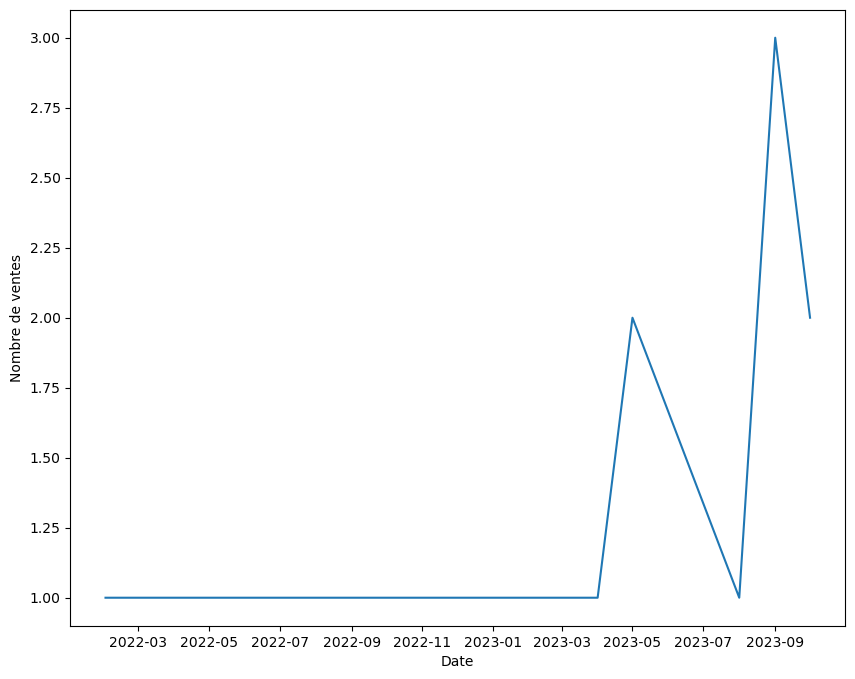

In [111]:
### Graphique linéaire
plt.figure(figsize=(10,8))
plt.plot(Jambon_des_Ardennes_df["Date"], Jambon_des_Ardennes_df["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

In [112]:
from statsmodels.tsa.stattools import adfuller  # Importation de la fonction adfuller
# Fonction pour effectuer le test ADF et différencier la série jusqu'à ce qu'elle soit stationnaire
def test_stationarity(series, diff_count=0):
    vente_result = adfuller(series)
    print(f"\nRésultats du test ADF pour la série temporelle:")
    print(f"Statistique ADF : {vente_result[0]}")
    print(f'p-value : {vente_result[1]}')
    print(f'Nombre de lags utilisés : {vente_result[2]}')
    print(f'Nombre d\'observations utilisées : {vente_result[3]}')
    print(f'Valeurs critiques :')
    for key, value in vente_result[4].items():
        print(f'\t{key}: {value}')

    # Interprétation
    if vente_result[1] < 0.05:
        print(f"La série temporelle est stationnaire après {diff_count} différenciations.")
        return series
    else:
        print("La série temporelle n'est pas stationnaire. Différenciation en cours...")
        # Différenciation
        diff_series = series.diff().dropna()
        return test_stationarity(diff_series, diff_count + 1)
    
    
print("Avant différentiation")
print(Jambon_des_Ardennes_df['Nombre de ventes'])

# Test sur le nombre de ventes
ventes_stationnaires = test_stationarity(Jambon_des_Ardennes_df['Nombre de ventes'])

print("Après différentiation")
print(ventes_stationnaires)

Avant différentiation
0    1
1    1
2    1
3    1
4    1
5    1
6    2
7    1
8    3
9    2
Name: Nombre de ventes, dtype: int64

Résultats du test ADF pour la série temporelle:
Statistique ADF : 1.9414506867883021
p-value : 0.9985918660273173
Nombre de lags utilisés : 2
Nombre d'observations utilisées : 7
Valeurs critiques :
	1%: -4.9386902332361515
	5%: -3.477582857142857
	10%: -2.8438679591836733
La série temporelle n'est pas stationnaire. Différenciation en cours...

Résultats du test ADF pour la série temporelle:
Statistique ADF : -0.1714985851425076
p-value : 0.9418347337006117
Nombre de lags utilisés : 2
Nombre d'observations utilisées : 6
Valeurs critiques :
	1%: -5.354256481481482
	5%: -3.6462381481481483
	10%: -2.901197777777778
La série temporelle n'est pas stationnaire. Différenciation en cours...

Résultats du test ADF pour la série temporelle:
Statistique ADF : -4.356069408063306
p-value : 0.00035472626234214934
Nombre de lags utilisés : 1
Nombre d'observations utilisées 

In [113]:
# Convertir la série en DataFrame
ventes_stationnaires_df = ventes_stationnaires.to_frame()

# Ajouter la colonne "Date" du DataFrame coppa_df
ventes_stationnaires_df['Date'] = Jambon_des_Ardennes_df['Date']

# Afficher le DataFrame
ventes_stationnaires_df

,Nombre de ventes,Date
2,0.0,2022-07-01
3,0.0,2022-09-01
4,0.0,2022-10-01
5,0.0,2023-04-01
6,1.0,2023-05-01
7,-2.0,2023-08-01
8,3.0,2023-09-01
9,-3.0,2023-10-01


In [114]:
# surchetillonnage des donnees

# Définir la colonne 'Date' comme index
ventes_stationnaires_df.set_index('Date', inplace=True)

# Rééchantillonnage avec une fréquence plus élevée
df_resampled = ventes_stationnaires_df.resample('D').interpolate(method='linear')

# Réinitialiser l'index
df_resampled = df_resampled.reset_index()

# Afficher le DataFrame avec le sur-échantillonnage
df_resampled

,Date,Nombre de ventes
0,2022-07-01,0.0
1,2022-07-02,0.0
2,2022-07-03,0.0
3,2022-07-04,0.0
4,2022-07-05,0.0
...,...,...
453,2023-09-27,-2.2
454,2023-09-28,-2.4
455,2023-09-29,-2.6
456,2023-09-30,-2.8


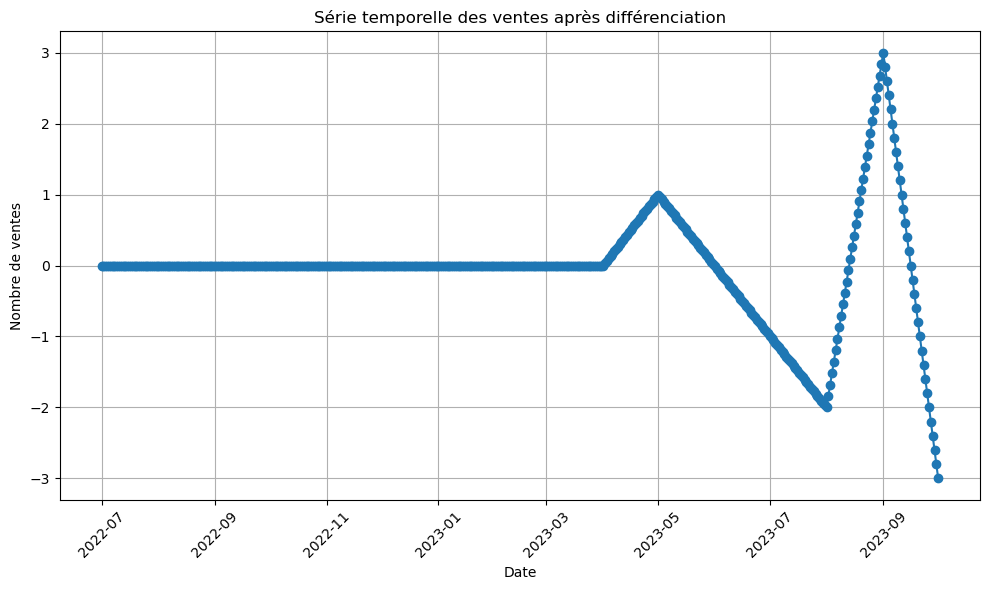

In [115]:
import matplotlib.pyplot as plt

# Tracer la série temporelle
plt.figure(figsize=(10, 6))
plt.plot(df_resampled['Date'], df_resampled['Nombre de ventes'], marker='o', linestyle='-')
plt.title('Série temporelle des ventes après différenciation')
plt.xlabel('Date')
plt.ylabel('Nombre de ventes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [116]:
# import itertools
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# import warnings
# warnings.filterwarnings('ignore')

# # Assurez-vous que coppa_df est défini

# # Paramètre d
# d = 0

# # Créer une liste des combinaisons possibles de p et q
# p = q = range(0, 7)
# pdq = list(itertools.product(p, q))

# # Initialiser les listes pour stocker les résultats
# results = []
# aic_values = []

# # Boucle sur toutes les combinaisons de p et q
# for param in pdq:
#     try:
#         model = ARIMA(df_resampled['Nombre de ventes'], order=(param[0], d, param[1]))
#         fitted_model = model.fit()
#         results.append(fitted_model)
#         aic_values.append(fitted_model.aic)
#     except:
#         continue

# # Trouver les ordres p et q qui minimisent l'AIC
# best_index = np.argmin(aic_values)
# best_model = results[best_index]
# best_pq = pdq[best_index]

# # Afficher les paramètres de la meilleure combinaison et la valeur de l'AIC minimale
# print(f"Meilleure combinaison d'ordres p, d et q: {best_pq[0]},{d},{best_pq[1]}")
# print(f"Valeur de l'AIC minimale: {best_model.aic}")

In [117]:
# Séparer les données d'entraînement et de test
train_data = df_resampled[df_resampled['Date'].dt.year != 2023]
test_data = df_resampled[df_resampled['Date'].dt.year >= 2023]

In [118]:
from statsmodels.tsa.arima.model import ARIMA

# Définir l'ordre du modèle ARIMA
order = (2,0,0)

# Entraîner le modèle ARIMA sur la série stationnaire
model = ARIMA(train_data['Nombre de ventes'], order=order)
model_fit_Jambon_des_Ardennes = model.fit()

# Stocker le modèle dans un dictionnaire avec la clé "coppa"
trained_models = {
    "coppa": model_fit_coppa,
    "Saucisson à la pistache": model_fit_Saucisson_à_la_pistache,
    "Sérum hydratant Vichy": model_fit_Sérum_hydratant_Vichy,
#     "Rillettes d'oie": model_fit_Rillettes_doie,
#     "Saucisson aux noisettes": model_fit_Saucisson_aux_noisettes,
    "Saucisson de Lyon": model_fit_Saucisson_de_Lyon,
    "Crème raffermissante pour le corps Garnier": model_fit_Crème_raffermissante_pour_le_corps_Garnier,
    "Jambon de Luxeuil": model_fit_Jambon_de_Luxeuil,
#     "Jambon de Ardennes": model_fit_Jambon_des_Ardennes,

}

# Résumé du modèle
print(model_fit_Jambon_des_Ardennes.summary())

                               SARIMAX Results                                
Dep. Variable:       Nombre de ventes   No. Observations:                  184
Model:                 ARIMA(2, 0, 0)   Log Likelihood                1957.384
Date:                Wed, 27 Mar 2024   AIC                          -3906.769
Time:                        11:21:09   BIC                          -3893.909
Sample:                             0   HQIC                         -3901.557
                                - 184                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.825e-06    1.2e-13  -4.01e+07      0.000   -4.82e-06   -4.82e-06
ar.L1       2.622e-18   5.77e-19      4.546      0.000    1.49e-18    3.75e-18
ar.L2       5.245e-18   5.74e-19      9.142      0.0

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


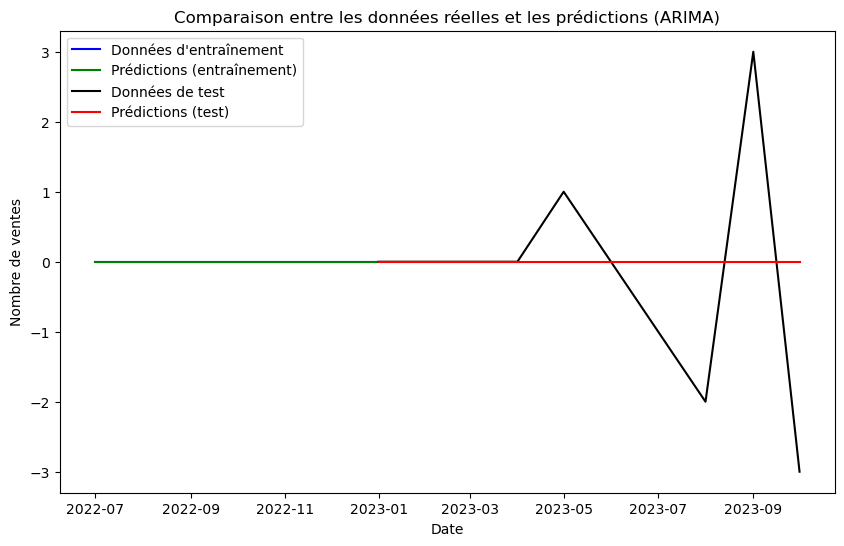

In [119]:
# Prédictions sur les données d'entraînement
train_predictions = model_fit_Jambon_des_Ardennes.predict(start=train_data.index.min(), end=train_data.index.max(), typ='levels')

# Prédictions sur les données de test
test_predictions = model_fit_Jambon_des_Ardennes.forecast(steps=len(test_data))

# Plot
plt.figure(figsize=(10, 6))

# Données d'entraînement
plt.plot(train_data['Date'], train_data['Nombre de ventes'], label='Données d\'entraînement', color='blue')

# Prédictions sur les données d'entraînement
plt.plot(train_data['Date'], train_predictions, label='Prédictions (entraînement)', color='green')

# Données de test
plt.plot(test_data['Date'], test_data['Nombre de ventes'], label='Données de test', color='black')

# Prédictions sur les données de test
plt.plot(test_data['Date'], test_predictions, label='Prédictions (test)', color='red')

plt.title('Comparaison entre les données réelles et les prédictions (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Nombre de ventes')
plt.legend()
plt.show()

In [120]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculer RMSE pour les données d'entraînement
train_predictions = model_fit_Jambon_des_Ardennes.predict(start=0, end=len(train_data)-1)
train_rmse = np.sqrt(mean_squared_error(train_data['Nombre de ventes'], train_predictions))

# Calculer RMSE pour les données de test
test_predictions = model_fit_Jambon_des_Ardennes.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
test_rmse = np.sqrt(mean_squared_error(test_data['Nombre de ventes'], test_predictions))

print("RMSE pour les données d'entraînement:", train_rmse)
print("RMSE pour les données de test:", test_rmse)


RMSE pour les données d'entraînement: 4.8245581658957315e-06
RMSE pour les données de test: 0.991182729715919


# Jambon de Bayonne	

In [240]:
# Accéder au DataFrame spécifique pour le produit
Jambon_de_Bayonne_df = sous_dataframes['Jambon de Bayonne']
Jambon_de_Bayonne_df.reset_index(drop=True, inplace=True)
Jambon_de_Bayonne_df

,Produit,Nombre de ventes,CA,Prix Unitaire,Date,Nombre de ventes_log
0,Jambon de Bayonne,1,1900.0,1900.0,2021-02-01,0.000000
1,Jambon de Bayonne,2,3800.0,1900.0,2022-05-01,0.693147
2,Jambon de Bayonne,1,1900.0,1900.0,2022-06-01,0.000000
3,Jambon de Bayonne,2,3800.0,1900.0,2022-07-01,0.693147
4,Jambon de Bayonne,1,1900.0,1900.0,2022-08-01,0.000000
5,Jambon de Bayonne,2,3800.0,1900.0,2022-12-01,0.693147
6,Jambon de Bayonne,3,5700.0,1900.0,2023-12-01,1.098612
7,Jambon de Bayonne,2,3800.0,1900.0,2024-01-01,0.693147


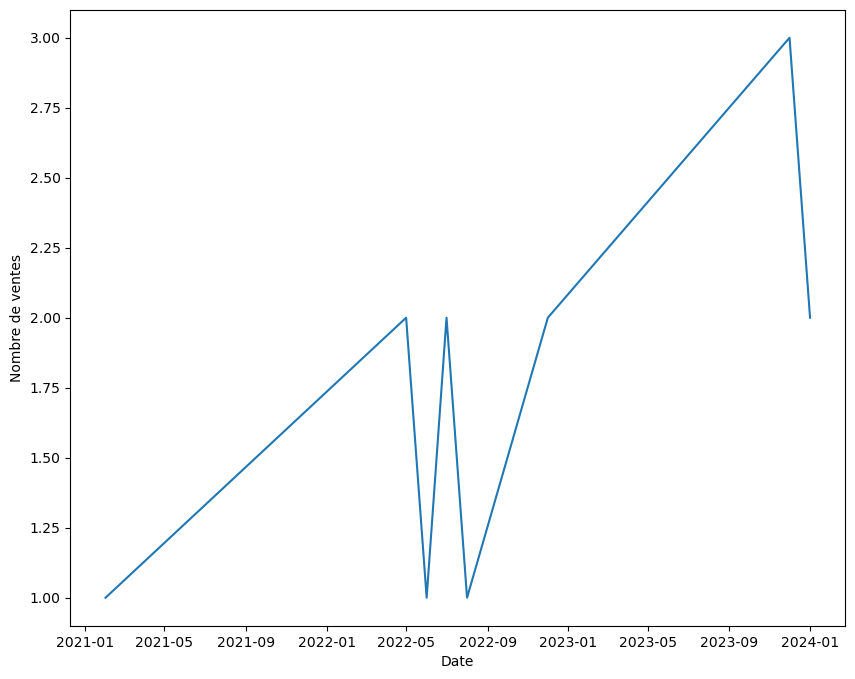

In [241]:
### Graphique linéaire
plt.figure(figsize=(10,8))
plt.plot(Jambon_de_Bayonne_df["Date"], Jambon_de_Bayonne_df["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

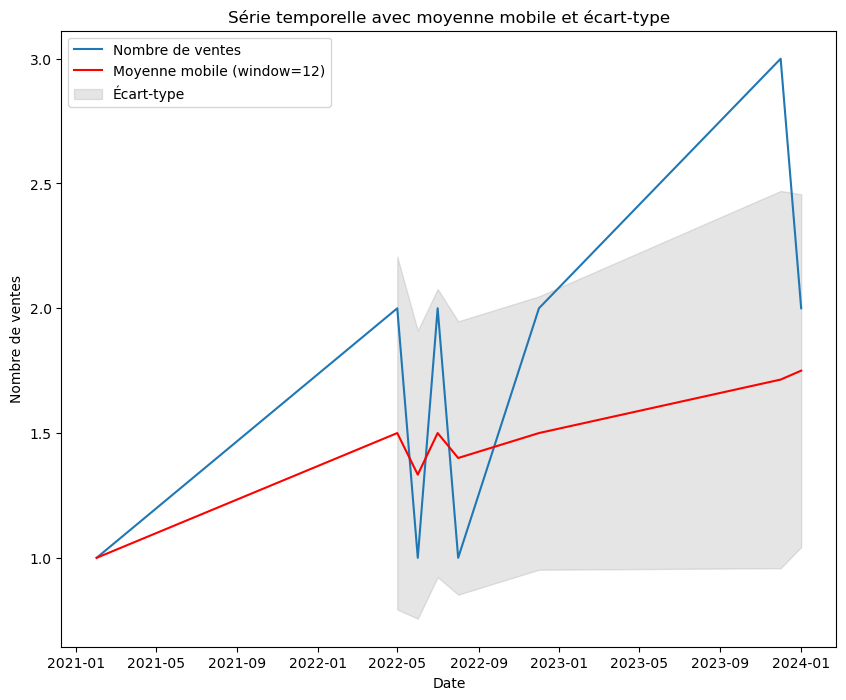

In [242]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que Jambon_de_Bayonne_df est votre DataFrame avec deux colonnes Date et Nombre de ventes

# Calculer la moyenne mobile et l'écart-type
rolling_mean = Jambon_de_Bayonne_df['Nombre de ventes'].rolling(window=12, min_periods=1).mean()
rolling_std = Jambon_de_Bayonne_df['Nombre de ventes'].rolling(window=12, min_periods=1).std()

# Visualisation des données d'origine avec la moyenne mobile et l'écart-type
plt.figure(figsize=(10, 8))
plt.plot(Jambon_de_Bayonne_df["Date"], Jambon_de_Bayonne_df["Nombre de ventes"], label='Nombre de ventes')
plt.plot(Jambon_de_Bayonne_df["Date"], rolling_mean, color='red', label='Moyenne mobile (window=12)')
plt.fill_between(Jambon_de_Bayonne_df["Date"], rolling_mean - rolling_std, rolling_mean + rolling_std, color='gray', alpha=0.2, label='Écart-type')
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.title("Série temporelle avec moyenne mobile et écart-type")
plt.legend()
plt.show()

In [243]:
result = adfuller(Jambon_de_Bayonne_df["Nombre de ventes"])
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -2.66474020049506
p-value : 0.08034099995000249
Valeurs Critiques :
	1%: -4.9386902332361515
	5%: -3.477582857142857
	10%: -2.8438679591836733


In [254]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que Jambon_de_Bayonne_df est votre DataFrame avec deux colonnes Date et Nombre de ventes

# Assurez-vous que la colonne "Nombre de ventes" est de type numérique
Jambon_de_Bayonne_df['Nombre de ventes'] = pd.to_numeric(Jambon_de_Bayonne_df['Nombre de ventes'], errors='coerce')

# Appliquer la transformation logarithmique à la colonne "Nombre de ventes"
Jambon_de_Bayonne_df_log = np.log(Jambon_de_Bayonne_df['Nombre de ventes'])

In [245]:
# Jambon_de_Bayonne_df_log

0    0.000000
1    0.693147
2    0.000000
3    0.693147
4    0.000000
5    0.693147
6    1.098612
7    0.693147
Name: Nombre de ventes, dtype: float64

In [246]:
# # Convertir la série en DataFrame
# Jambon_de_Bayonne_df_log = Jambon_de_Bayonne_df_log.to_frame()

# # Ajouter la colonne "Date" du DataFrame coppa_df
# Jambon_de_Bayonne_df_log['Date'] = Jambon_de_Bayonne_df['Date']

# # Afficher le DataFrame
# Jambon_de_Bayonne_df_log

,Nombre de ventes,Date
0,0.000000,2021-02-01
1,0.693147,2022-05-01
2,0.000000,2022-06-01
3,0.693147,2022-07-01
4,0.000000,2022-08-01
5,0.693147,2022-12-01
6,1.098612,2023-12-01
7,0.693147,2024-01-01


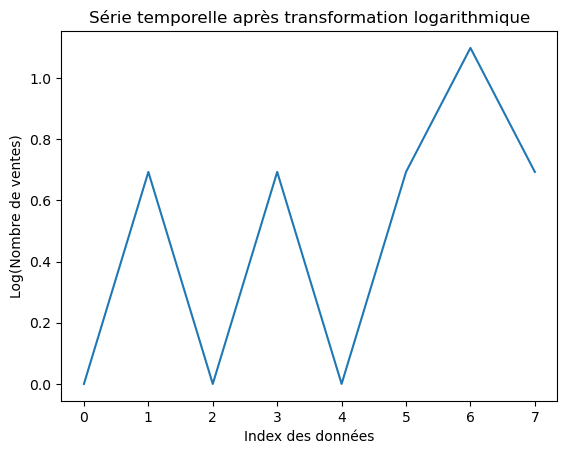

In [259]:
# Visualisation des données transformées
plt.plot(Jambon_de_Bayonne_df_log)
plt.xlabel('Index des données')
plt.ylabel('Log(Nombre de ventes)')
plt.title('Série temporelle après transformation logarithmique')
plt.show()

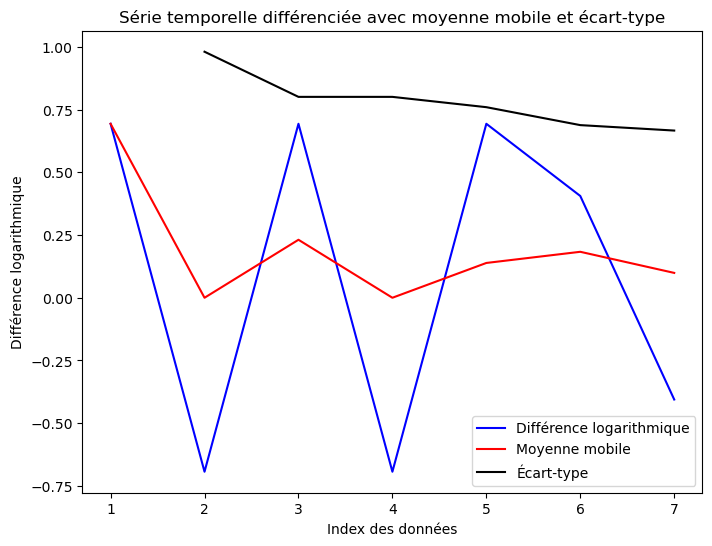

Statistiques ADF: -5.8043400414890085
p-value: 4.553393447877427e-07
Valeurs critiques:
    1%: -5.354256481481482
    5%: -3.6462381481481483
    10%: -2.901197777777778


In [263]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Calcul de la différence entre les valeurs logarithmiques
df_log_shift = Jambon_de_Bayonne_df['Nombre de ventes_log'] - Jambon_de_Bayonne_df['Nombre de ventes_log'].shift()

# Suppression des valeurs NaN résultant de la différenciation
df_log_shift.dropna(inplace=True)

# Calcul de la moyenne mobile et de l'écart-type sur la série différenciée
rolling_mean_diff = df_log_shift.rolling(window=12, min_periods=1).mean()
rolling_std_diff = df_log_shift.rolling(window=12, min_periods=1).std()

# Visualisation des données différenciées avec la moyenne mobile et l'écart-type
plt.figure(figsize=(8, 6))
plt.plot(df_log_shift, color='blue', label='Différence logarithmique')
plt.plot(rolling_mean_diff, color='red', label='Moyenne mobile')
plt.plot(rolling_std_diff, color='black', label='Écart-type')
plt.xlabel('Index des données')
plt.ylabel('Différence logarithmique')
plt.title('Série temporelle différenciée avec moyenne mobile et écart-type')
plt.legend()
plt.show()

# Test de la stationnarité avec le test ADF
result = adfuller(df_log_shift)
print('Statistiques ADF:', result[0])
print('p-value:', result[1])
print('Valeurs critiques:')
for key, value in result[4].items():
    print(f'    {key}: {value}')

In [324]:
from statsmodels.tsa.stattools import adfuller  # Importation de la fonction adfuller
# Fonction pour effectuer le test ADF et différencier la série jusqu'à ce qu'elle soit stationnaire
def test_stationarity(series, diff_count=0):
    vente_result = adfuller(series)
    print(f"\nRésultats du test ADF pour la série temporelle:")
    print(f"Statistique ADF : {vente_result[0]}")
    print(f'p-value : {vente_result[1]}')
    print(f'Nombre de lags utilisés : {vente_result[2]}')
    print(f'Nombre d\'observations utilisées : {vente_result[3]}')
    print(f'Valeurs critiques :')
    for key, value in vente_result[4].items():
        print(f'\t{key}: {value}')

    # Interprétation
    if vente_result[1] < 0.05:
        print(f"La série temporelle est stationnaire après {diff_count} différenciations.")
        return series
    else:
        print("La série temporelle n'est pas stationnaire. Différenciation en cours...")
        # Différenciation
        diff_series = series.diff().dropna()
        return test_stationarity(diff_series, diff_count + 1)
    
    
print("Avant différentiation")
print(df_log_shift)

# Test sur le nombre de ventes
ventes_stationnaires = test_stationarity(df_log_shift)

print("Après différentiation")
print(ventes_stationnaires)

Avant différentiation
1    0.693147
2   -0.693147
3    0.693147
4   -0.693147
5    0.693147
6    0.405465
7   -0.405465
Name: Nombre de ventes_log, dtype: float64

Résultats du test ADF pour la série temporelle:
Statistique ADF : -5.8043400414890085
p-value : 4.553393447877427e-07
Nombre de lags utilisés : 0
Nombre d'observations utilisées : 6
Valeurs critiques :
	1%: -5.354256481481482
	5%: -3.6462381481481483
	10%: -2.901197777777778
La série temporelle est stationnaire après 0 différenciations.
Après différentiation
1    0.693147
2   -0.693147
3    0.693147
4   -0.693147
5    0.693147
6    0.405465
7   -0.405465
Name: Nombre de ventes_log, dtype: float64


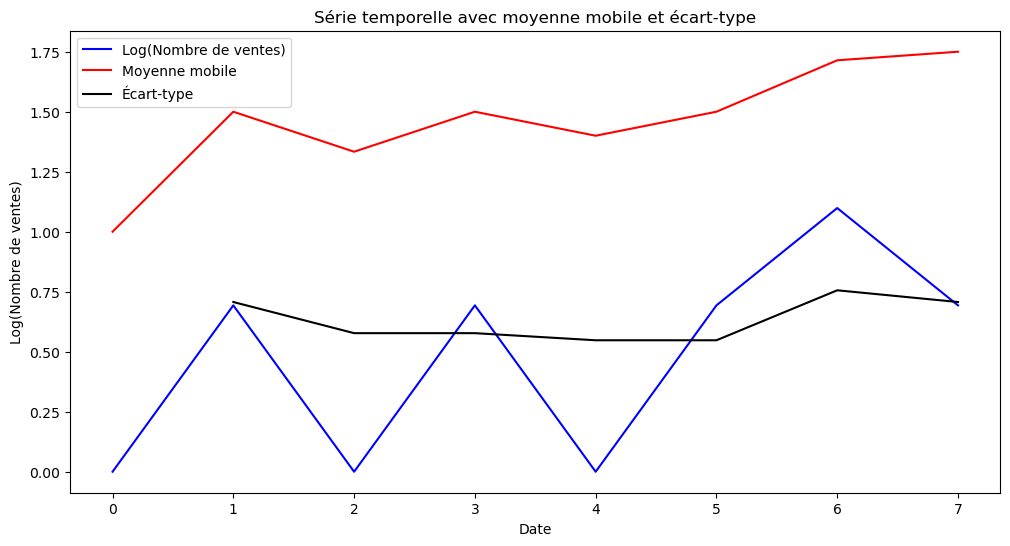

Statistiques ADF: -3.021302240397133
p-value: 0.03295236231366473
Valeurs critiques:
    1%: -4.9386902332361515
    5%: -3.477582857142857
    10%: -2.8438679591836733


In [268]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Visualisation des données transformées avec la moyenne mobile et l'écart-type
# plt.figure(figsize=(12, 6))
# plt.plot(Jambon_de_Bayonne_df_log, color='blue', label='Log(Nombre de ventes)')
# plt.plot(rolling_mean, color='red', label='Moyenne mobile')
# plt.plot(rolling_std, color='black', label='Écart-type')
# plt.xlabel('Date')
# plt.ylabel('Log(Nombre de ventes)')
# plt.title('Série temporelle avec moyenne mobile et écart-type')
# plt.legend()
# plt.show()

# # Test de la stationnarité avec le test ADF
# result = adfuller(Jambon_de_Bayonne_df['Nombre de ventes_log'].dropna())
# print('Statistiques ADF:', result[0])
# print('p-value:', result[1])
# print('Valeurs critiques:')
# for key, value in result[4].items():
#     print(f'    {key}: {value}')

In [124]:
# # Convertir la série en DataFrame
# ventes_stationnaires_df = ventes_stationnaires.to_frame()

# # Ajouter la colonne "Date" du DataFrame coppa_df
# ventes_stationnaires_df['Date'] = Jambon_de_Bayonne_df['Date']

# # Afficher le DataFrame
# ventes_stationnaires_df

,Nombre de ventes,Date
1,1.0,2022-05-01
2,-1.0,2022-06-01
3,1.0,2022-07-01
4,-1.0,2022-08-01
5,1.0,2022-12-01
6,1.0,2023-12-01
7,-1.0,2024-01-01


In [212]:
# # Convertir la série en DataFrame
# Jambon_de_Bayonne_df_log = Jambon_de_Bayonne_df_log.to_frame()

# # Ajouter la colonne "Date" du DataFrame coppa_df
# Jambon_de_Bayonne_df_log['Date'] = Jambon_de_Bayonne_df['Date']

# # Afficher le DataFrame
# Jambon_de_Bayonne_df_log



In [290]:
# # Importer pandas
# import pandas as pd

# # Définir les dates normales
# dates_normales = pd.to_datetime([
#     '2021-02-01', '2022-05-01', '2022-06-01', '2022-07-01',
#     '2022-08-01', '2022-12-01', '2023-12-01', '2024-01-01'
# ])

# # Définir les dates de suréchantillonnage
# dates_sur_echantillonnage = pd.date_range(start=dates_normales.min(), end=dates_normales.max(), freq='D')

# # Réindexer le DataFrame pour inclure les dates de suréchantillonnage et remplir les valeurs manquantes avec 0
# df_resampled = df_resampled.reindex(dates_sur_echantillonnage, fill_value=0)
# df_resampled

,Date,Nombre de ventes
2021-02-01,0,0.0
2021-02-02,0,0.0
2021-02-03,0,0.0
2021-02-04,0,0.0
2021-02-05,0,0.0
...,...,...
2023-12-28,0,0.0
2023-12-29,0,0.0
2023-12-30,0,0.0
2023-12-31,0,0.0


In [299]:
# # surchetillonnage des donnees

# # # Définir la colonne 'Date' comme index
# # ventes_stationnaires_df.set_index('Date', inplace=True)

# # Rééchantillonnage avec une fréquence plus élevée
# df_resampled = ventes_stationnaires_df.resample('D').asfreq().fillna(0)

# # Réinitialiser l'index
# df_resampled = df_resampled.reset_index()

# # Afficher le DataFrame avec le sur-échantillonnage
# df_resampled

,Date,Nombre de ventes
0,2022-05-01,1.0
1,2022-05-02,0.0
2,2022-05-03,0.0
3,2022-05-04,0.0
4,2022-05-05,0.0
...,...,...
606,2023-12-28,0.0
607,2023-12-29,0.0
608,2023-12-30,0.0
609,2023-12-31,0.0


In [318]:
ventes_stationnaires_df=ventes_stationnaires_df.reset_index()
ventes_stationnaires_df.columns

Index(['index', 'Date', 'Nombre de ventes'], dtype='object')

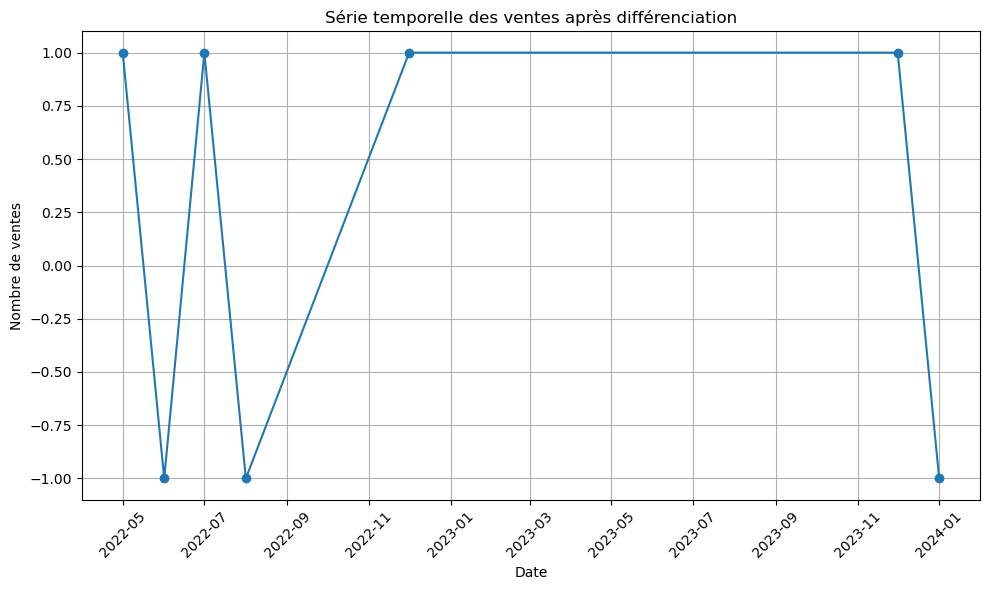

In [311]:
import matplotlib.pyplot as plt

# Tracer la série temporelle
plt.figure(figsize=(10, 6))
plt.plot(ventes_stationnaires_df['Nombre de ventes'], marker='o', linestyle='-')
plt.title('Série temporelle des ventes après différenciation')
plt.xlabel('Date')
plt.ylabel('Nombre de ventes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: could not broadcast input array from shape (7,) into shape (18,)

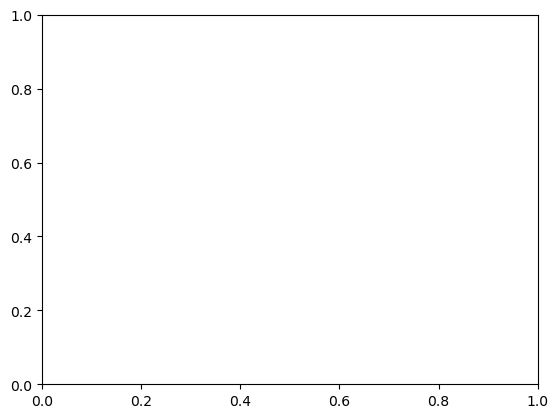

In [328]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Charger vos données dans une série temporelle (remplacer 'votre_serie_temporelle' par votre propre série)
# serie_temporelle = pd.Series(ventes_stationnaires_df)

# Calculer l'ACF et la PACF
plot_acf(ventes_stationnaires_df['Nombre de ventes'], lags=17)
plt.title('Autocorrélation (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plot_pacf(ventes_stationnaires_df['Nombre de ventes'], lags=17)
plt.title('Autocorrélation partielle (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()


In [301]:
# import itertools
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# import warnings
# warnings.filterwarnings('ignore')

# # Assurez-vous que coppa_df est défini

# # Paramètre d
# d = 0

# # Créer une liste des combinaisons possibles de p et q
# p = q = range(0, 7)
# pdq = list(itertools.product(p, q))

# # Initialiser les listes pour stocker les résultats
# results = []
# aic_values = []

# # Boucle sur toutes les combinaisons de p et q
# for param in pdq:
#     try:
#         model = ARIMA(df_resampled['Nombre de ventes'], order=(param[0], d, param[1]))
#         fitted_model = model.fit()
#         results.append(fitted_model)
#         aic_values.append(fitted_model.aic)
#     except:
#         continue

# # Trouver les ordres p et q qui minimisent l'AIC
# best_index = np.argmin(aic_values)
# best_model = results[best_index]
# best_pq = pdq[best_index]

# # Afficher les paramètres de la meilleure combinaison et la valeur de l'AIC minimale
# print(f"Meilleure combinaison d'ordres p, d et q: {best_pq[0]},{d},{best_pq[1]}")
# print(f"Valeur de l'AIC minimale: {best_model.aic}")

In [312]:
import itertools
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# Assurez-vous que coppa_df est défini

# Paramètre d
d = 0

# Créer une liste des combinaisons possibles de p et q
p = q = range(0, 7)
pdq = list(itertools.product(p, q))

# Initialiser les listes pour stocker les résultats
results = []
aic_values = []

# Boucle sur toutes les combinaisons de p et q
for param in pdq:
    try:
        model = ARIMA(ventes_stationnaires_df['Nombre de ventes'], order=(param[0], d, param[1]))
        fitted_model = model.fit()
        results.append(fitted_model)
        aic_values.append(fitted_model.aic)
    except:
        continue

# Trouver les ordres p et q qui minimisent l'AIC
best_index = np.argmin(aic_values)
best_model = results[best_index]
best_pq = pdq[best_index]

# Afficher les paramètres de la meilleure combinaison et la valeur de l'AIC minimale
print(f"Meilleure combinaison d'ordres p, d et q: {best_pq[0]},{d},{best_pq[1]}")
print(f"Valeur de l'AIC minimale: {best_model.aic}")

Meilleure combinaison d'ordres p, d et q: 5,0,2
Valeur de l'AIC minimale: 0.06594518402690852


In [319]:
# Séparer les données d'entraînement et de test
train_data = ventes_stationnaires_df[ventes_stationnaires_df['Date'].dt.year != 2023]
test_data = ventes_stationnaires_df[ventes_stationnaires_df['Date'].dt.year >= 2023]

In [320]:
from statsmodels.tsa.arima.model import ARIMA

# Définir l'ordre du modèle ARIMA
order = (5,0,2)

# Entraîner le modèle ARIMA sur la série stationnaire
model = ARIMA(train_data['Nombre de ventes'], order=order)
model_fit_Jambon_de_Bayonne = model.fit()

# Stocker le modèle dans un dictionnaire avec la clé "coppa"
trained_models = {
    "coppa": model_fit_coppa,
    "Saucisson à la pistache": model_fit_Saucisson_à_la_pistache,
    "Sérum hydratant Vichy": model_fit_Sérum_hydratant_Vichy,
    "Rillettes d'oie": model_fit_Rillettes_doie,
    "Saucisson aux noisettes": model_fit_Saucisson_aux_noisettes,
    "Saucisson de Lyon": model_fit_Saucisson_de_Lyon,
    "Crème raffermissante pour le corps Garnier": model_fit_Crème_raffermissante_pour_le_corps_Garnier,
    "Jambon de Luxeuil": model_fit_Jambon_de_Luxeuil,
    "Jambon de Ardennes": model_fit_Jambon_des_Ardennes,
    "Jambon de Bayonne": model_fit_Jambon_de_Bayonne

}

# Résumé du modèle
print(model_fit_Jambon_de_Bayonne.summary())

                               SARIMAX Results                                
Dep. Variable:       Nombre de ventes   No. Observations:                    6
Model:                 ARIMA(5, 0, 2)   Log Likelihood                  18.200
Date:                Wed, 27 Mar 2024   AIC                            -18.400
Time:                        14:52:07   BIC                            -20.274
Sample:                             0   HQIC                           -25.902
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.036e-06      0.002     -0.002      0.999      -0.004       0.004
ar.L1          1.6250      0.001   1314.208      0.000       1.623       1.627
ar.L2         -0.3275      0.011    -30.075      0.0

In [305]:
# # Prédictions sur les données d'entraînement
# train_predictions = model_fit_Jambon_de_Bayonne.predict(start=train_data.index.min(), end=train_data.index.max(), typ='levels')

# # Prédictions sur les données de test
# test_predictions = model_fit_Jambon_de_Bayonne.forecast(steps=len(test_data))

# # Plot
# plt.figure(figsize=(10, 6))

# # Données d'entraînement
# plt.plot(train_data['Date'], train_data['Nombre de ventes'], label='Données d\'entraînement', color='blue')

# # Prédictions sur les données d'entraînement
# plt.plot(train_data['Date'], train_predictions, label='Prédictions (entraînement)', color='green')

# # Données de test
# plt.plot(test_data['Date'], test_data['Nombre de ventes'], label='Données de test', color='black')

# # Prédictions sur les données de test
# plt.plot(test_data['Date'], test_predictions, label='Prédictions (test)', color='red')

# plt.title('Comparaison entre les données réelles et les prédictions (ARIMA)')
# plt.xlabel('Date')
# plt.ylabel('Nombre de ventes')
# plt.legend()
# plt.show()

In [321]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculer RMSE pour les données d'entraînement
train_predictions = model_fit_Jambon_de_Bayonne.predict(start=0, end=len(train_data)-1)
train_rmse = np.sqrt(mean_squared_error(train_data['Nombre de ventes'], train_predictions))

# Calculer RMSE pour les données de test
test_predictions = model_fit_Jambon_de_Bayonne.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
test_rmse = np.sqrt(mean_squared_error(test_data['Nombre de ventes'], test_predictions))

print("RMSE pour les données d'entraînement:", train_rmse)
print("RMSE pour les données de test:", test_rmse)


RMSE pour les données d'entraînement: 0.4082495377369065
RMSE pour les données de test: 3.3610257241679596e-05


In [322]:
# Prédiction pour avril 2024
forecast_steps = 30  # Nombre de jours à prédire pour avril 2024
forecast = model_fit_Jambon_de_Bayonne.forecast(steps=forecast_steps)

# Afficher les prédictions
print("Prédictions pour avril 2024:")
print(forecast)


Prédictions pour avril 2024:
6     0.999965
7    -0.999968
8     0.999950
9    -0.999934
10    0.999925
11   -0.999913
12    0.999894
13   -0.999890
14    0.999867
15   -0.999863
16    0.999843
17   -0.999836
18    0.999817
19   -0.999810
20    0.999791
21   -0.999784
22    0.999765
23   -0.999758
24    0.999739
25   -0.999732
26    0.999713
27   -0.999706
28    0.999687
29   -0.999680
30    0.999661
31   -0.999654
32    0.999635
33   -0.999628
34    0.999609
35   -0.999602
Name: predicted_mean, dtype: float64


In [323]:
# Appliquer l'exponentielle pour revenir aux valeurs originales
predictions_originales = np.exp(forecast)
predictions_originales

6     2.718187
7     0.367891
8     2.718147
9     0.367904
10    2.718078
11    0.367912
12    2.717992
13    0.367920
14    2.717921
15    0.367930
16    2.717855
17    0.367940
18    2.717784
19    0.367949
20    2.717713
21    0.367959
22    2.717643
23    0.367969
24    2.717573
25    0.367978
26    2.717502
27    0.367988
28    2.717431
29    0.367997
30    2.717361
31    0.368007
32    2.717290
33    0.368016
34    2.717220
35    0.368026
Name: predicted_mean, dtype: float64

 Dans le contexte de la préparation des données pour l'analyse de séries chronologiques, voici l'ordre typique des étapes :

1. **Exploration des données** : Visualisez les données pour comprendre les tendances, les saisons et d'autres motifs.
  
2. **Traitement des données manquantes** : Vérifiez et traitez les valeurs manquantes si nécessaire. Les données manquantes peuvent être problématiques lors de l'analyse de séries chronologiques.

3. **Stabilisation de la variance** : Si la variance des données change avec le temps, appliquez une transformation appropriée (comme la transformation logarithmique) pour stabiliser la variance.

4. **Différenciation** : Si les données présentent une tendance ou des saisons, différenciez-les pour les rendre stationnaires. Cela implique de soustraire les valeurs de la série temporelle actuelle des valeurs précédentes.

5. **Identification du modèle** : Identifiez les ordres (p, d, q) pour le modèle ARIMA en examinant les autocorrélations et les autocorrélations partielles des données différenciées.

6. **Ajustement du modèle** : Ajustez le modèle ARIMA aux données en utilisant les paramètres identifiés à l'étape précédente.

7. **Validation du modèle** : Utilisez des méthodes de validation croisée ou de validation temporelle pour évaluer les performances du modèle.

8. **Prévision** : Utilisez le modèle ajusté pour faire des prédictions sur des périodes futures.

9. **Évaluation des prédictions** : Évaluez les prédictions du modèle à l'aide de métriques appropriées.

Il est important de noter que ces étapes peuvent être itératives et que vous pourriez avoir besoin de revenir en arrière et d'ajuster certaines étapes en fonction des résultats que vous obtenez. Par exemple, vous pourriez avoir besoin d'essayer différentes transformations ou de différencier la série à plusieurs reprises pour obtenir une stationnarité.

In [132]:
# voir les modèles
trained_models

{'coppa': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x15d71f188d0>,
 'Saucisson à la pistache': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x15d795ffe90>,
 'Sérum hydratant Vichy': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x15d71f97990>,
 'Saucisson de Lyon': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x15d797ec490>,
 'Crème raffermissante pour le corps Garnier': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x15d79830490>,
 'Jambon de Luxeuil': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x15d77588290>}

In [133]:
trained_models= pd.DataFrame.from_dict(trained_models, orient='index', columns=['Model'])
trained_models

,Model
coppa,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
Saucisson à la pistache,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
Sérum hydratant Vichy,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
Saucisson de Lyon,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
Crème raffermissante pour le corps Garnier,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
Jambon de Luxeuil,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...


In [144]:
import pandas as pd

# Supposons que trained_models_df soit votre DataFrame contenant les modèles entraînés
# trained_models_df = pd.DataFrame({
#     'Model': {
#         'coppa': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x28c727a6dd0>,
#         'Saucisson à la pistache': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x28c747bced0>,
#         'Sérum hydratant Vichy': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x28c74a60650>,
#         'Saucisson de Lyon': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x28c7488d8d0>,
#         'Crème raffermissante pour le corps Garnier': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x28c72777990>,
#         'Jambon de Luxeuil': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x28c76393f90>
#     }
# })

# Définir la date d'avril 2024
date_avril_2024 = pd.Timestamp('2023-01-01')

# Créer une liste pour stocker les prédictions
predictions = []

# Parcourir les lignes du DataFrame
for product, model in trained_models.iterrows():
    # Faire une prédiction pour la date d'avril 2024
    prediction_avril_2024 = model['Model'].forecast(steps=1)  # Prendre la dernière valeur de la prédiction
    
    # Stocker la prédiction dans la liste des prédictions
    predictions.append({'Produit': product, 'Prédiction_avril_2024': prediction_avril_2024})

# Convertir la liste des prédictions en DataFrame
predictions_df = pd.DataFrame(predictions)

# Afficher le DataFrame des prédictions
predictions_df

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Produit,Prédiction_avril_2024
0,coppa,365 0.000099 dtype: float64
1,Saucisson à la pistache,700 2.958163 dtype: float64
2,Sérum hydratant Vichy,246 8.246822e-10 dtype: float64
3,Saucisson de Lyon,580 1.00061 dtype: float64
4,Crème raffermissante pour le corps Garnier,579 1.000395 dtype: float64
5,Jambon de Luxeuil,579 1.000264 dtype: float64


In [148]:
import pandas as pd

# Assumons que les modèles ARIMA ont déjà été entraînés et sont stockés dans `model_fit1` et `model_fit2` pour Andouille et Colgate, respectivement.

# Pour simplifier, définissons une fonction qui calcule le nombre de mois jusqu'à février 2024 pour chaque produit
def months_until_feb_2024(current_date):
    future_date = pd.Timestamp('2024-02-01')
    months_diff = (future_date.year - current_date.year) * 12 + future_date.month - current_date.month
    return months_diff

# Calcul des étapes à prédire pour atteindre février 2024
steps = months_until_feb_2024(test_data['Date'].max())

# Effectuer les prédictions et convertir les résultats en list pour accéder au dernier élément avec [-1]
prediction = list(model_fit_Jambon_de_Bayonne.forecast(steps=steps))[-1]  # Dernière prédiction pour Andouille

# Créer un DataFrame pour afficher les prédictions
predictions_df = pd.DataFrame({
    'Produit': ["Jambon de Bayonne"],
    'Prédiction de ventes en Février 2024': [prediction]
})

predictions_df

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Produit,Prédiction de ventes en Février 2024
0,Jambon de Bayonne,-2.631594


In [146]:
train_predictions

0     -0.144943
1      0.985149
2      0.856610
3      0.793622
4      0.730634
         ...   
241    0.972884
242    0.972884
243    0.972884
244    0.972884
610    0.972884
Name: predicted_mean, Length: 246, dtype: float64

In [ ]:
import pandas as pd

# Créer une fonction pour calculer le nombre de mois jusqu'à février 2024 pour chaque produit
def months_until_feb_2024(current_date):
    future_date = pd.Timestamp('2024-02-01')
    months_diff = (future_date.year - current_date.year) * 12 + future_date.month - current_date.month
    return months_diff

# Créer un DataFrame pour stocker les prédictions
predictions = []

# Itérer sur chaque produit et son modèle associé dans le dictionnaire trained_models
for product, model_fit in trained_models.items():
    # Créer un DataFrame vide pour stocker les prédictions spécifiques à ce produit
    product_predictions = pd.DataFrame(columns=['Date', 'Prediction'])
    
    # Calculer les étapes à prédire pour atteindre février 2024
    steps = months_until_feb_2024(train_data['Date'].max())  # Assurez-vous de disposer des données de formation (train_data)
    
    # Effectuer la prédiction pour chaque étape et stocker les résultats
    for i in range(1, steps + 1):
        # Calculer la date pour cette prédiction
        prediction_date = train_data['Date'].max() + pd.DateOffset(months=i)
        
        # Effectuer la prédiction pour cette étape
        prediction = model_fit.forecast(steps=1)
        
        # Ajouter cette prédiction au DataFrame des prédictions spécifiques à ce produit
        product_predictions = product_predictions.append({'Date': prediction_date, 'Prediction': prediction}, ignore_index=True)
    
    # Stocker les prédictions spécifiques à ce produit dans le DataFrame global des prédictions
    predictions.append({'Produit': product, 'Prédictions': product_predictions})

# Afficher les prédictions
for prediction in predictions:
    print(prediction['Produit'])
    if 'Prédictions' in prediction:
        print(prediction['Prédictions'])
    else:
        print("Aucune prédiction disponible pour ce produit.")

In [ ]:
azerty

In [ ]:
import pandas as pd

# Créer une date pour février 2024
fevrier_2024 = pd.to_datetime('2024-02-01')

# Créer un DataFrame pour stocker les prédictions
predictions_fevrier_2024 = pd.DataFrame(index=[fevrier_2024])

# Faire des prédictions pour chaque modèle ARIMA entraîné
for produit, model in trained_models.items():
    # Prédire les valeurs pour février 2024
    prediction = model.predict(n_periods=1)
    
    # Stocker la prédiction dans le DataFrame avec le nom du produit comme colonne
    predictions_fevrier_2024[produit] = prediction

# Afficher les prédictions pour février 2024
predictions_fevrier_2024